<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Yulu%20Hypothesis%20Case%20Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

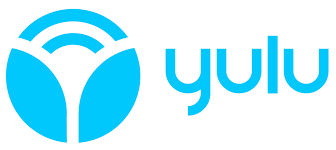

* Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
* Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

# **Business Problem**

Determine factors affecting the demand for these shared electric cycles in the Indian market

* Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
* How well those variables describe the electric cycle demands

# **Desired Outcome of Analysis**

* Statistically Determine the Significant variable effecting the Demand of Shared Elctric Cycle in Indian Market
* Do Bivariate Analysis & Statitically conlcude with Appropriate Hypotheis testing
* Example :
** 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented
** ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season
** Chi-square test to check if Weather is dependent on the season







# **Loading Modules and Data**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, binom, geom

from scipy.stats import ttest_1samp, ttest_ind,ttest_rel

from scipy.stats import chisquare,chi2,chi2_contingency

from scipy.stats import f_oneway,kruskal,shapiro,levene
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import pearsonr,spearmanr

from scipy.stats import poisson,expon
!pip install category_encoders
from category_encoders import TargetEncoder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 576.2 kB/s eta 0:00:00


In [4]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv")

# **Basic Metric Analysis & Data type Coversion**

In [ ]:
data.shape

(10886, 12)

In [ ]:
data.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=10886, step=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Let us change name of some of the columns as per given description
* check if (count = Casual + Registered) & change column name "count" --> "total_count"
* change column name "atemp" --> "feeling_temp"

In [ ]:
np.all(data["count"] == data["registered"] + data["casual"])

True

In [5]:
data.rename({"count":"total_count"},axis=1,inplace= True)
data.rename({"atemp":"feeling_temp"},axis=1,inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      10886 non-null  object 
 1   season        10886 non-null  int64  
 2   holiday       10886 non-null  int64  
 3   workingday    10886 non-null  int64  
 4   weather       10886 non-null  int64  
 5   temp          10886 non-null  float64
 6   feeling_temp  10886 non-null  float64
 7   humidity      10886 non-null  int64  
 8   windspeed     10886 non-null  float64
 9   casual        10886 non-null  int64  
 10  registered    10886 non-null  int64  
 11  total_count   10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* season, weather, holiday, workingday columns have Dtype as "int64", lets convert them to "Category" as they are categorical data
* Also We will convert "datetime" Column Dtype to "datetime64[ns]"


In [6]:
data["datetime"]=data["datetime"].astype("datetime64[ns]")
data["season"]=data["season"].astype("category")
data["weather"]=data["weather"].astype("category")
data['holiday']=data['holiday'].astype("category")
data["workingday"]=data["workingday"].astype("category")

In [9]:
data.dtypes

datetime        datetime64[ns]
season                category
holiday               category
workingday            category
weather               category
temp                   float64
feeling_temp           float64
humidity                 int64
windspeed              float64
casual                   int64
registered               int64
total_count              int64
dtype: object

* season, weather, holiday, workingday columns : dtype have been changed to "category"
* datatime column : Dtype changed to datetime64[ns]

In [ ]:
# Checking count of Unique values of Each Column
data.nunique()

datetime        10886
season              4
holiday             2
workingday          2
weather             4
temp               49
feeling_temp       60
humidity           89
windspeed          28
casual            309
registered        731
total_count       822
dtype: int64

In [ ]:
data.describe()

temp  feeling_temp      humidity     windspeed        casual  \
count  10886.00000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      20.23086     23.655084     61.886460     12.799395     36.021955   
std        7.79159      8.474601     19.245033      8.164537     49.960477   
min        0.82000      0.760000      0.000000      0.000000      0.000000   
25%       13.94000     16.665000     47.000000      7.001500      4.000000   
50%       20.50000     24.240000     62.000000     12.998000     17.000000   
75%       26.24000     31.060000     77.000000     16.997900     49.000000   
max       41.00000     45.455000    100.000000     56.996900    367.000000   

         registered   total_count  
count  10886.000000  10886.000000  
mean     155.552177    191.574132  
std      151.039033    181.144454  
min        0.000000      1.000000  
25%       36.000000     42.000000  
50%      118.000000    145.000000  
75%      222.000000    284.000000  
max      886.000000    977.000000

* Dataset is collected between 1st Jan 2011 to  19th Dec 2012
* Dataset has recording collected in all 4 Seasons & Weathers
* Data set has recording collectd in Workingdays & Holidays
* Temperature's range from 0.82 ~ 41.0
* But Tempeture felt ranged between 0.76 ~ 45.45
* Humidity range from 0 ~ 100 & Wind speed from 0 ~ 56.99
* Casual Booking minimmum is "0" & Maximum are 367 per day
* Registered Booking minimum is 0  & Maximum are 886 per day
* Overall Total Booking Count ranged from 1 ~ 977 per day
* from Mean - Median analysis of Casual, Registered & Total booking count : We can say definitely some Unusual bookings observed some days[Outliers]

# **Data Cleaning - Duplicates,Null Values & Outliers**

## Duplicates

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace= True)

No Duplicates Rows Found

## Null Values

In [ ]:
data.isna().sum(axis=0)

datetime        0
season          0
holiday         0
workingday      0
weather         0
temp            0
feeling_temp    0
humidity        0
windspeed       0
casual          0
registered      0
total_count     0
dtype: int64

No "NAN" found in Data

## Outliers - Visualization using Box Plot & Numerically using IQR

* Outliers can be found in Casual, registered & total_count Columns
* We will visualize the outliers using boxplot
* we will get all possible parameters of a box plot using User defined function --> "boxplotallparameter(x)"

In [10]:
# Userdefined function to get all statistical parameter of univariate boxplot including upper & lower limit values of a given series
# "x" --> Any Numerical Series
def boxplotallparameter(x):
  IQR = np.percentile(x,75) - np.percentile(x,25)
  lower_limit = max (np.percentile(x,25) - 1.5*IQR,0)
  upper_limit = np.percentile(x,75) + 1.5*IQR
  print("Minimum:",min(x))
  print("Lower_Limit:",lower_limit)
  print("Quantile25:",np.percentile(x,25))
  print("Median:",np.percentile(x,50))
  print("Quantile75:",np.percentile(x,75))
  print("Upper_Limit:",upper_limit)
  print("Maximum:",max(x))

### casual

<Axes: ylabel='casual'>

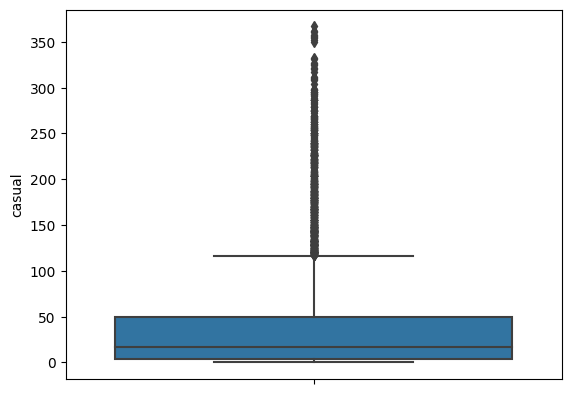

In [ ]:
sns.boxplot(data= data, y= "casual")

In [ ]:
boxplotallparameter(data["casual"])

Minimum: 0
Lower_Limit: 0
Quantile25: 4.0
Median: 17.0
Quantile75: 49.0
Upper_Limit: 116.5
Maximum: 367


* casual user per day range between 0 to 116, however there are some unsual booking some days ranging from 117 to 367 per day


### registered

<Axes: ylabel='registered'>

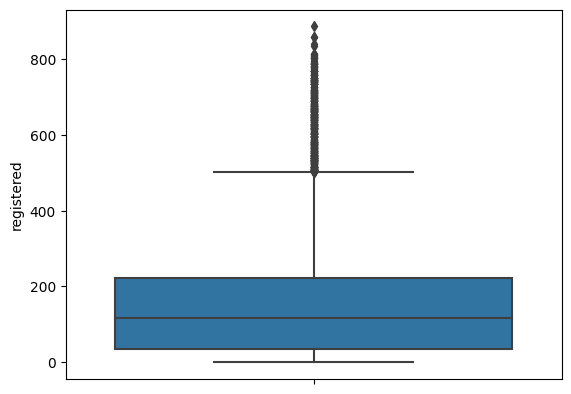

In [ ]:
sns.boxplot(data= data, y= 'registered')

In [ ]:
boxplotallparameter(data['registered'])

Minimum: 0
Lower_Limit: 0
Quantile25: 36.0
Median: 118.0
Quantile75: 222.0
Upper_Limit: 501.0
Maximum: 886


* registered user per day range between 0 to 501, however there are some unsual booking some days ranging from 502 to 886 per day

### total_count

<Axes: ylabel='total_count'>

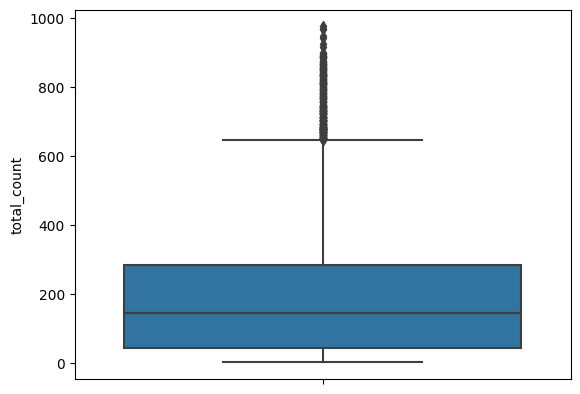

In [ ]:
sns.boxplot(data= data,y= "total_count")

In [ ]:
boxplotallparameter(data["total_count"])

Minimum: 1
Lower_Limit: 0
Quantile25: 42.0
Median: 145.0
Quantile75: 284.0
Upper_Limit: 647.0
Maximum: 977


* total_count of user per day range between 0 to 647, however there are some unsual booking some days ranging from 648 to 977 per day

# **Correlation among Data**

In [ ]:
data.corr()

<ipython-input-29-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


temp  feeling_temp  humidity  windspeed    casual  \
temp          1.000000      0.984948 -0.064949  -0.017852  0.467097   
feeling_temp  0.984948      1.000000 -0.043536  -0.057473  0.462067   
humidity     -0.064949     -0.043536  1.000000  -0.318607 -0.348187   
windspeed    -0.017852     -0.057473 -0.318607   1.000000  0.092276   
casual        0.467097      0.462067 -0.348187   0.092276  1.000000   
registered    0.318571      0.314635 -0.265458   0.091052  0.497250   
total_count   0.394454      0.389784 -0.317371   0.101369  0.690414   

              registered  total_count  
temp            0.318571     0.394454  
feeling_temp    0.314635     0.389784  
humidity       -0.265458    -0.317371  
windspeed       0.091052     0.101369  
casual          0.497250     0.690414  
registered      1.000000     0.970948  
total_count     0.970948     1.000000

<ipython-input-30-48d00ee6b6e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap = "Greens")


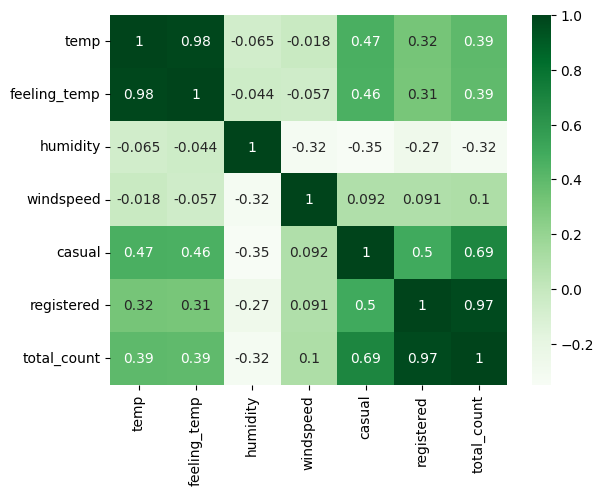

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

* temp & Humidity have some correlation with User Counts

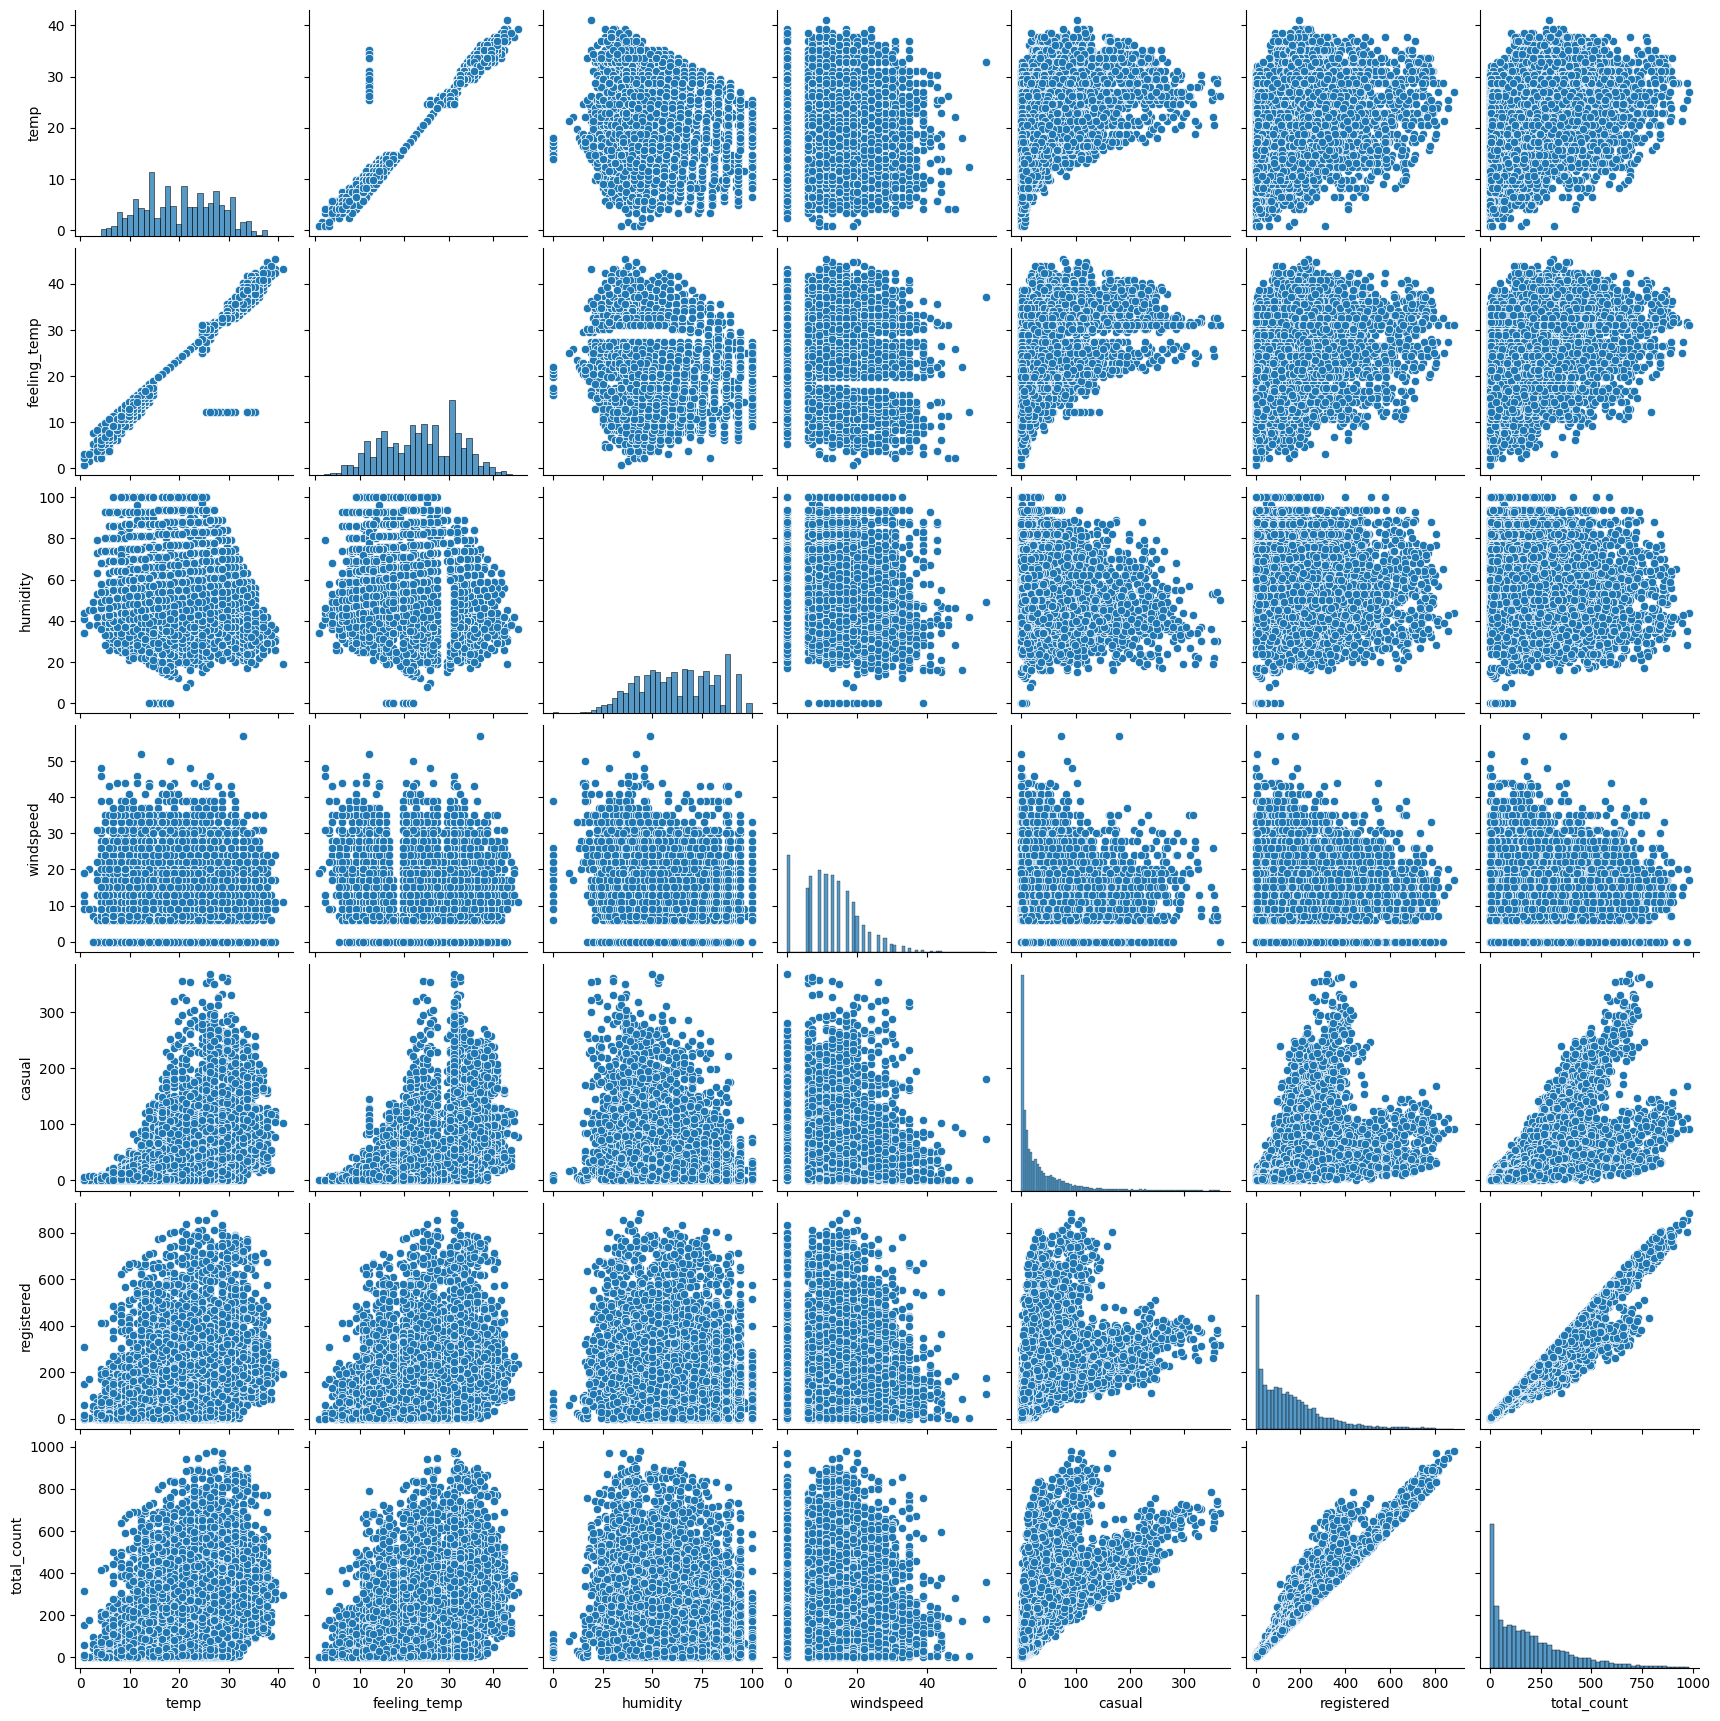

In [ ]:
sns.pairplot(data)


* Very good Correlation between Temp & feeling_Temp [0.98]
* Very good correlation observed between Registered & total_count [0.97]
* As total_count increase, the distribution range of casual increase [0.69]
* Casual user count has good correation with temp [0.47]
* Temperature/feeling_temp have some what correlation with Registered[0.32] & total_count[0.39]
* Humidity has some what correlation with Casual[-0.35] & total_count[-0.32]

# **UniVariate, Bivariate Analysis Set up**

* Lets define all the Uerdefined functions for doing Bivariate analysis in this section

We will create user defined function to get BIvariate plots : "bivariateplot(info,cat,num)"
* info --> Dataframe
* cat --> any category column header
* num --> any numerical column header

In [11]:
def bivariateplot(info,cat,num):
   plt.figure(figsize = (18,6))
   plt.subplot(1,4,1)
   plt.title("Mean Count value")
   sns.barplot(data=info,y=num,x = cat, estimator = "mean")
   plt.subplot(1,2,2)
   plt.title("Count Density")
   sns.kdeplot(data=info,x=num,hue = cat)
   plt.subplot(1,4,2)
   plt.title("Count box plot")
   sns.boxplot(data=info,y=num,x = cat)
   plt.show()

we will create another user defined function to get all statistical paramters of bivariate Boxplot
* cat --> any category column
* num --> any numerical column

In [12]:
def bivariateboxplotparameter(cat,num):
  A = data.groupby(cat)[num].describe()
  A["upper_Limit"] = (data.groupby(cat)[num].quantile(0.75)-data.groupby(cat)[num].quantile(0.25))*1.5+data.groupby(cat)[num].quantile(0.75)
  return A

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'feeling_temp', 'humidity', 'windspeed', 'casual', 'registered',
       'total_count'],
      dtype='object')

# **Hypothesis Testing Set up**

In this section let us fix the Confidence level & Level of Signification for all our Hypothesis testing.

As this is with respect to predicting demand Situation
* let us Assume **we want 95% Confidence to reject Null Hypothesi**s
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

# **Impact of Season on User Count**



## Season

1: spring, 2: summer, 3: fall, 4: winter

### Univariate Analysis

In [ ]:
data['season'].value_counts(normalize = True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

## Season & total_count

### Bivariate Analysis

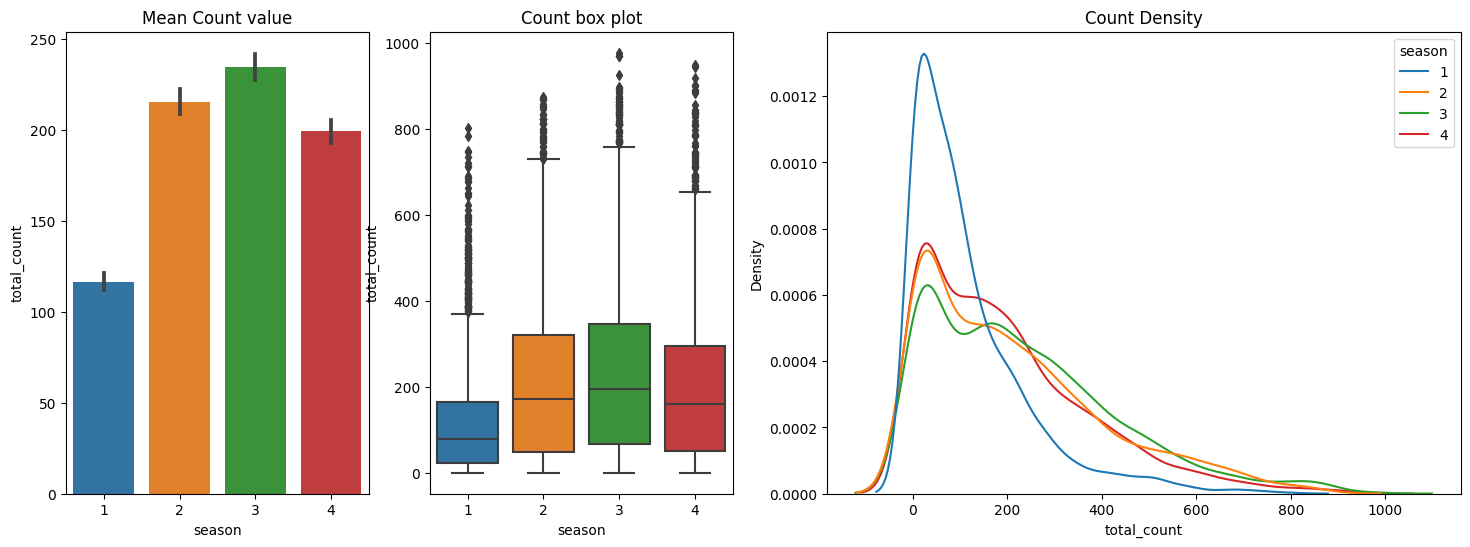

In [ ]:
bivariateplot(info = data,cat ="season",num="total_count")

In [ ]:
bivariateboxplotparameter(cat ="season",num="total_count")

count        mean         std  min   25%    50%    75%    max  \
season                                                                   
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0   
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0   
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0   
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0   

        upper_Limit  
season               
1             374.0  
2             729.0  
3             765.5  
4             658.5

* No of user total_count in "1:Spring" season are very low with upper limit of 374
* whereas user total_count is highest in "3:fall" are high with upper limit count as 765


Let us do Hypthesis testing to check if Season has effect on Total_Count

### Hypothesis Testing

As we have 4 groups in seasons Category --> we will use ANNOVA & check how does seasons effect on user count

* Ho --> All seasons have same user count mean
* Ha --> Some seasons user count Mean are different

Before using ANNOVA, we will check if all 4 season category data is following Normal Distribution & does they have equal variance

* For Normal Distribution, we will use Shapiro test with below Hypothesis Condition
** H0 : Data is Gaussian
** Ha : Data is not Gaussian

* For Equal Variances Check, we will use Leven Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




In [ ]:
season1 = data[data["season"]==1]["total_count"]
season2 = data[data["season"]==2]["total_count"]
season3 = data[data["season"]==3]["total_count"]
season4 = data[data["season"]==4]["total_count"]

let's check for Normal Distribution of all four season data sets

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in [season1,season2,season3,season4]:
  test_stat, p_value = shapiro(i)
  if p_value < 0.05:
       print("Reject H0")
       print("Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print("Data is Gaussian")

Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian


* All 4 Season Data sets are not following Normal Distribution
* Once will check Histogram plot

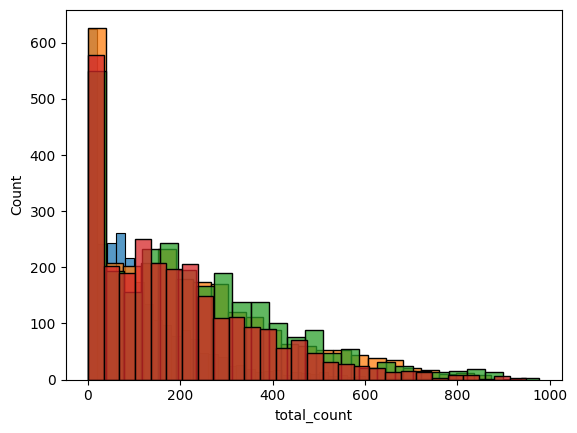

In [ ]:
for i in [season1,season2,season3,season4]:
  sns.histplot(i)

* Even the Histogram shows that they are not following Normal Distribution,kind of following power-law distribution
* Let's do QQ Plot also

<Figure size 300x200 with 0 Axes>

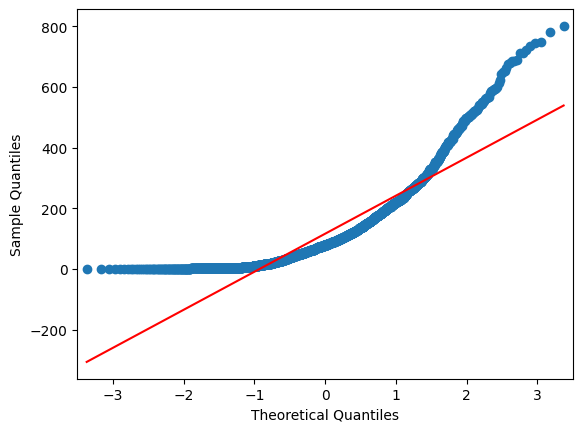

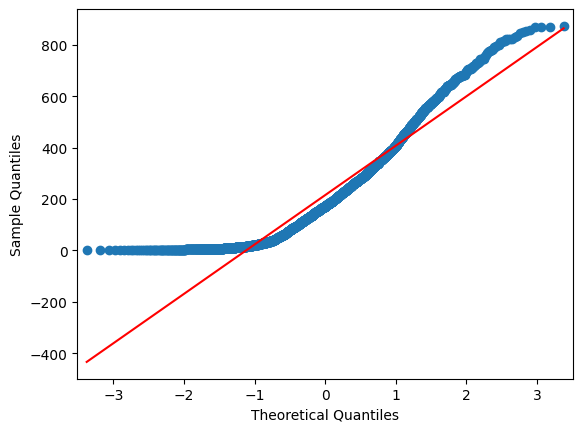

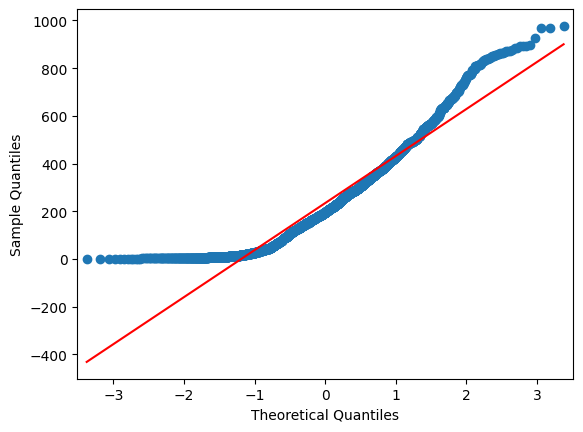

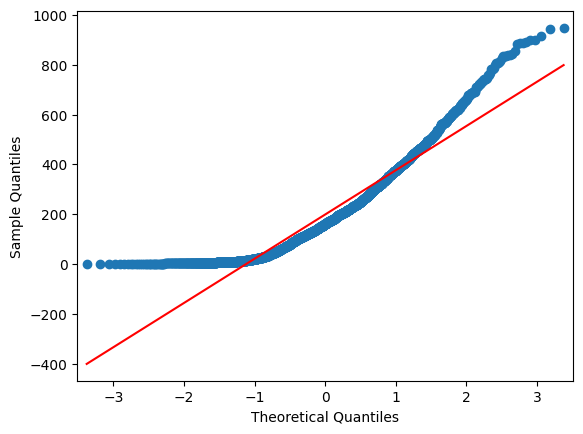

In [ ]:
plt.figure(figsize = (3,2))
for i in [season1,season2,season3,season4]:
   qqplot(i, line="s")

* From Shapiro, Histogram & QQ plot--> we can conclude that 4 season data sets are not following Normal Distribution
* Now we will do Levene test to check for equal Variances

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

1.0147116860043298e-118
Reject Ho
Variances are not equal


* All four Seaons Datasets do not have equal Variance
* So 2 of 3 ANNOVA assumption fails, we will do kruskal Wallis test

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

2.479008372608633e-151
Reject H0
One or more groups have different mean


lets once check what might ANNOVA test give as result

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

f_stats, p_value = f_oneway(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

6.164843386499654e-149
Reject H0
One or more groups have different mean


Both ANNOVA & Kriskal Wallis test state the Seasons has Impact on the total_user count

With >95% confidence we can say that **Season has impact on total_user Count**

## Season & registered

### Bivariate Analysis

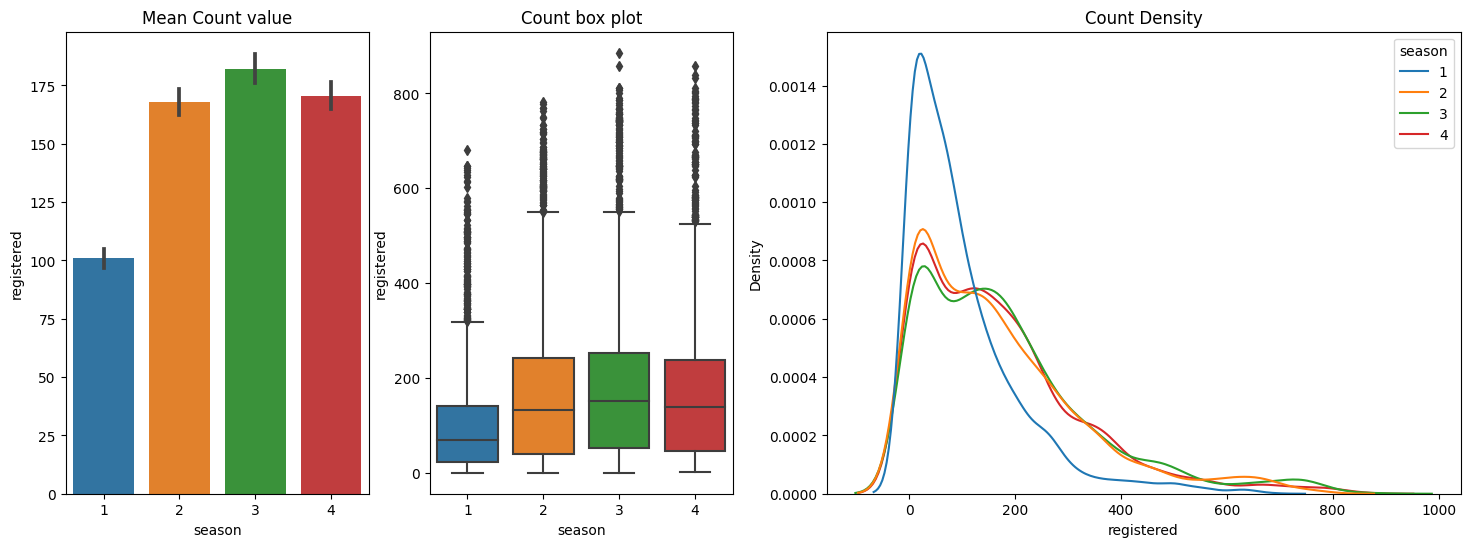

In [ ]:
bivariateplot(info = data,cat ="season",num="registered")

In [ ]:
bivariateboxplotparameter(cat ="season",num="registered")

count        mean         std  min   25%    50%     75%    max  \
season                                                                    
1       2686.0  100.853686  108.082025  0.0  22.0   69.0  141.00  681.0   
2       2733.0  167.804610  156.156658  0.0  39.0  133.0  243.00  782.0   
3       2733.0  182.196853  164.386982  0.0  53.0  151.0  252.00  886.0   
4       2734.0  170.407462  154.828357  1.0  46.0  139.0  238.75  857.0   

        upper_Limit  
season               
1           319.500  
2           549.000  
3           550.500  
4           527.875

Let us do Hypthesis testing to check if Season has effect on Registered

### Hypthesis Testing

* As Bivariate "Count Density" plots are almost Similar to Total_count,they also do not follow Normal Distribution
* So we will straight away do Kruskalwallis test

In [ ]:
season1 = data[data["season"]==1]["registered"]
season2 = data[data["season"]==2]["registered"]
season3 = data[data["season"]==3]["registered"]
season4 = data[data["season"]==4]["registered"]

#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

2.3698212326776174e-117
Reject H0
One or more groups have different mean


with >95% confidence we can say that **season has impact on registered user Count also**

## Season & casual

### Bivariate Analysis

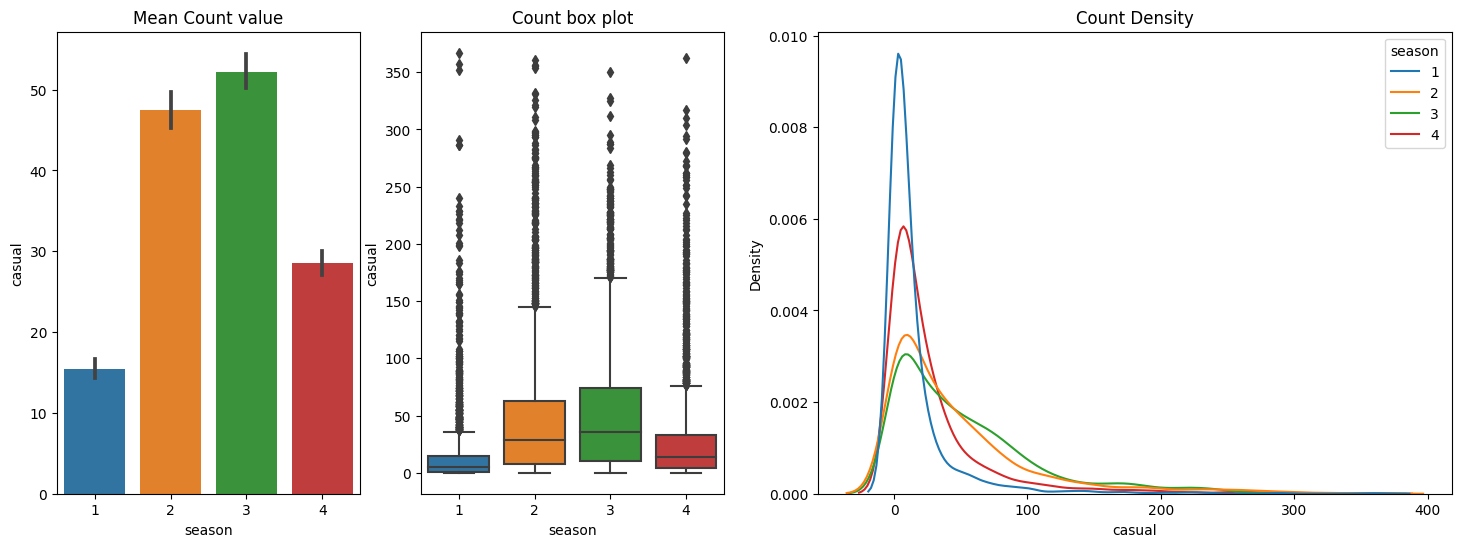

In [ ]:
bivariateplot(info = data,cat ="season",num="casual")

In [ ]:
bivariateboxplotparameter(cat ="season",num="casual")

count       mean        std  min   25%   50%   75%    max  \
season                                                               
1       2686.0  15.489576  31.222498  0.0   1.0   5.0  15.0  367.0   
2       2733.0  47.446762  57.649556  0.0   8.0  29.0  63.0  361.0   
3       2733.0  52.220271  54.638059  0.0  10.0  36.0  74.0  350.0   
4       2734.0  28.580834  42.596214  0.0   4.0  14.0  33.0  362.0   

        upper_Limit  
season               
1              36.0  
2             145.5  
3             170.0  
4              76.5

Let us do Hypthesis testing to check if Season has effect on Casual

### Hypothesis Testing

* As seen Bivariate "Count Density" plots are almost Similar to Total_count, they also do not follow Normal Distribution
* So we will straight away do Kruskalwallis test

In [ ]:
season1 = data[data["season"]==1]["casual"]
season2 = data[data["season"]==2]["casual"]
season3 = data[data["season"]==3]["casual"]
season4 = data[data["season"]==4]["casual"]

#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(season1,season2,season3,season4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.0
Reject H0
One or more groups have different mean


with >95% confidence we can say that **Season has impact on Casual user Count also**

# **Impact of Weather on User Count**

## Weather

* 1: Clear, Few clouds, partly cloudy, partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Univariate Analysis

In [ ]:
data['weather'].value_counts(normalize = True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

## Weather & total_count

### Bivariate Analysis

<ipython-input-42-a4ea6cc46d6b>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=info,x=num,hue = cat)


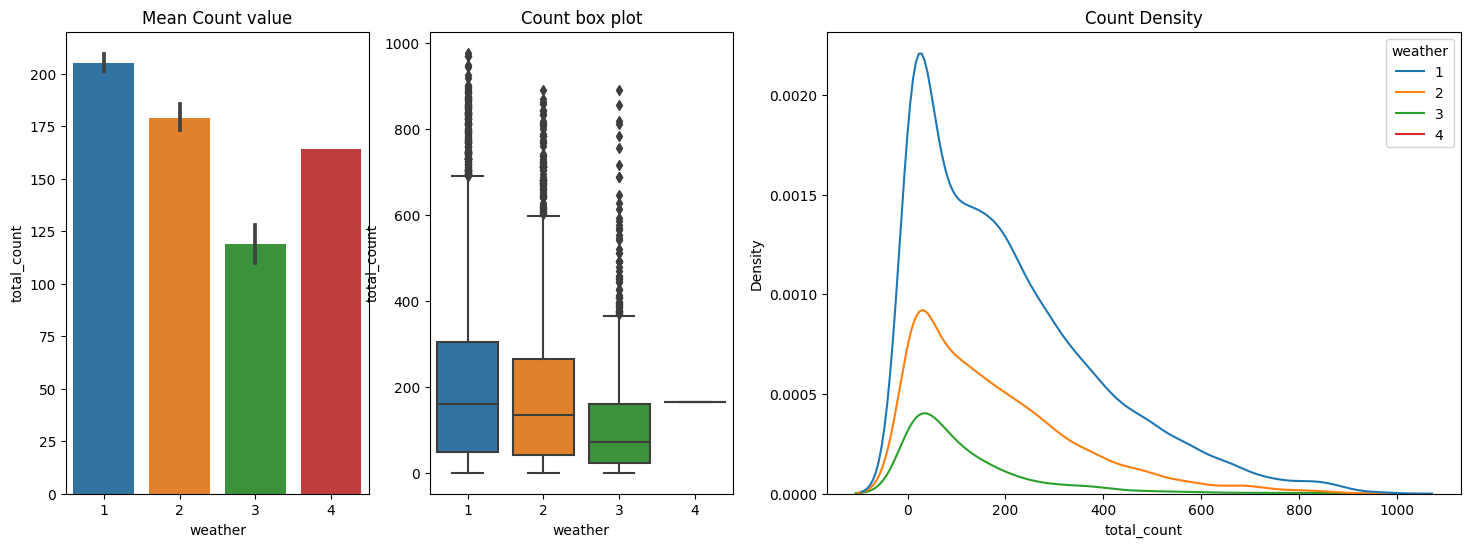

In [ ]:
bivariateplot(info = data,cat ="weather",num="total_count")

In [ ]:
bivariateboxplotparameter(cat ="weather",num="total_count")

count        mean         std    min    25%    50%    75%    max  \
weather                                                                      
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0   
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0   
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0   
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0   

         upper_Limit  
weather               
1              690.5  
2              598.5  
3              368.0  
4              164.0

* No of user total_count reduced as the weather became severe
* Weather:1 has total_count upper limit as 690
* weather:3 has total_count upper limit as 368
* There was only one booking for weather:4 with 164 users[registered : 158 & casual:6]

Now let us do Hypothesis Testing to check if Weather has impact on total_Count

### Hypothesis Testing

As we have 4 groups in weather Category --> we will use ANNOVA & check how does weather effect on user count

* Ho --> All weather's have same user count mean
* Ha --> Some weather's user count Mean are different

Before using ANNOVA, we will check if all 4 weather category data is following Normal Distribution & does they have equal variance

* For Normal Distribution, we will use Shapiro test with below Hypothesis Condition
** H0 : Data is Gaussian
** Ha : Data is not Gaussian

* For Equal Variances Check, we will use Leven Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




In [ ]:
weather1 = data[data["weather"]==1]["total_count"]
weather2 = data[data["weather"]==2]["total_count"]
weather3 = data[data["weather"]==3]["total_count"]
weather4 = data[data["weather"]==4]["total_count"]

let's check for Normal Distribution of all four weather data sets, But weather4 has only 1 reading, so we cannot do Shapiro test

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in [weather1,weather2,weather3]:
  test_stat, p_value = shapiro(i)
  if p_value < 0.05:
       print("Reject H0")
       print("Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print("Data is Gaussian")

Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian
Reject H0
Data is Not Gaussian


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* All 4 Weather Data sets are not following Normal Distribution
* Once will check Histogram plot

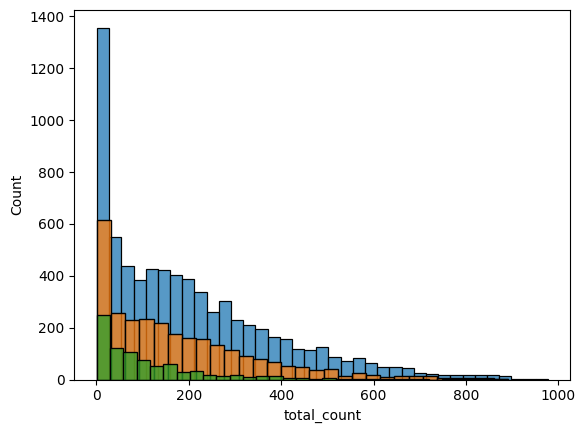

In [ ]:
for i in [weather1,weather2,weather3,weather4]:
  sns.histplot(i)

* Even the Histogram shows that they are not following Normal Distribution, it seems their distribution follow like Power-law Distribtion
* Let's do QQ Plot also

<Figure size 300x200 with 0 Axes>

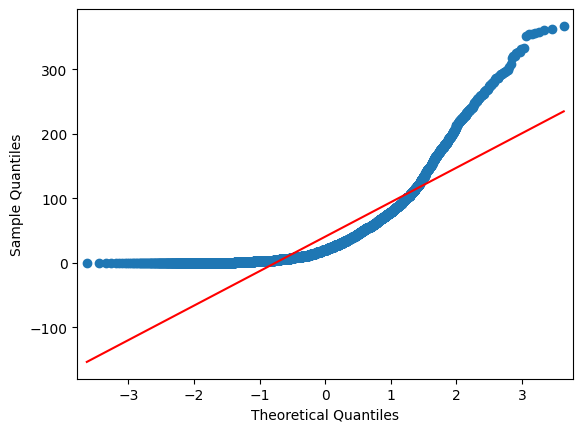

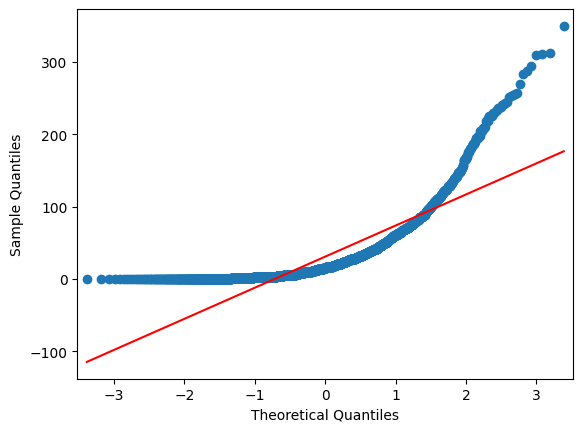

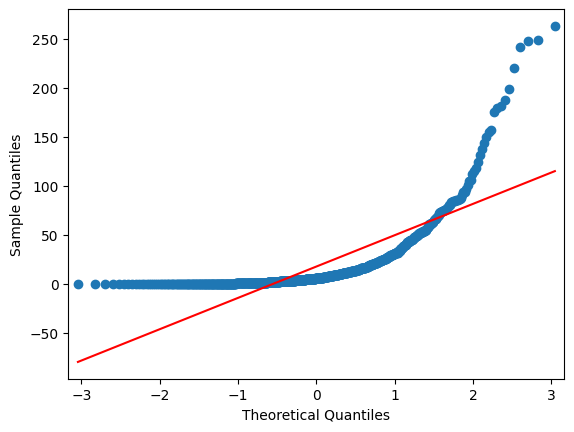

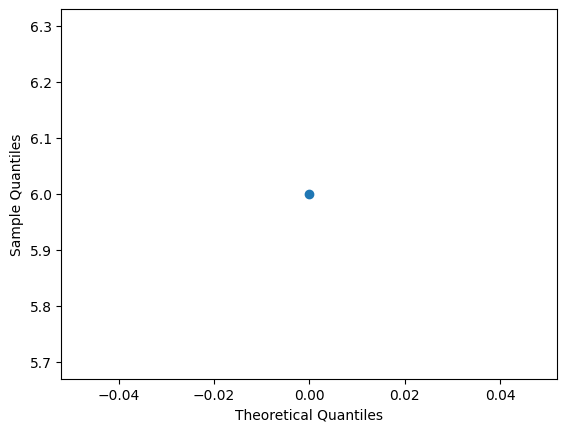

In [ ]:
plt.figure(figsize = (3,2))
for i in [weather1,weather2,weather3,weather4]:
   qqplot(i, line="s")

* From Shapiro, Histogram & QQ plot--> we can conclude that 4 weather data sets are not following Normal Distribution
* Now we will do Levene test to check for equal Variances

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(weather1,weather2,weather3,weather4)
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

3.504937946833238e-35
Reject Ho
Variances are not equal


* All four weather Datasets do not have equal Variance
* So 2 of 3 ANNOVA assumption fails, we will do kruskal Wallis test

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(weather1,weather2,weather3,weather4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

3.501611300708679e-44
Reject H0
One or more groups have different mean


lets once check ANNOVA test result also

In [ ]:
#H0 : All groups have same mean
#Ha : One or more groups have different mean

f_stats, p_value = f_oneway(weather1,weather2,weather3,weather4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

5.482069475935669e-42
Reject H0
One or more groups have different mean


Both ANNOVA & Kriskal Wallis test state the Weather has Impact on the total_user count

With >95% confidence we can say that **weather has impact on total_user Count**

## Weather & Registered

### Bivariate Analysis

<ipython-input-42-a4ea6cc46d6b>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=info,x=num,hue = cat)


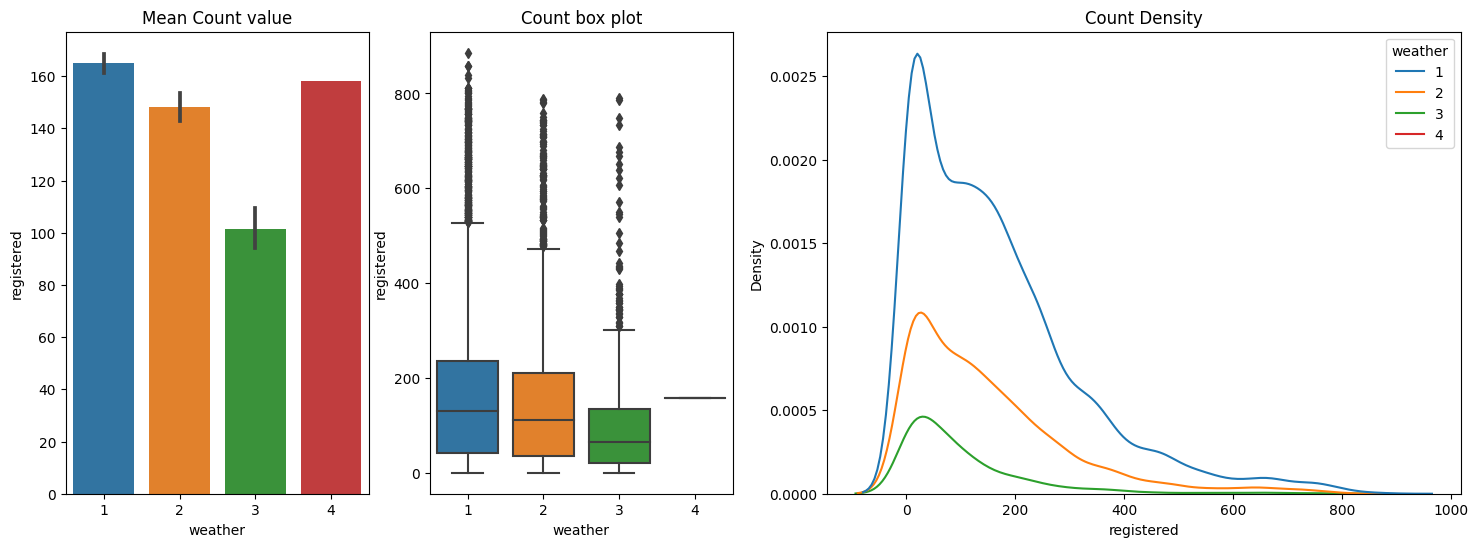

In [ ]:
bivariateplot(info = data,cat ="season",num="registered")

In [ ]:
bivariateboxplotparameter(cat ="weather",num="registered")

count        mean         std    min    25%    50%    75%    max  \
weather                                                                      
1        7192.0  164.928115  155.294051    0.0   41.0  130.0  236.0  886.0   
2        2834.0  148.170078  144.765721    0.0   35.0  112.0  211.0  788.0   
3         859.0  101.403958  119.344152    0.0   21.5   64.0  134.0  791.0   
4           1.0  158.000000         NaN  158.0  158.0  158.0  158.0  158.0   

         upper_Limit  
weather               
1             528.50  
2             475.00  
3             302.75  
4             158.00

Now let us do Hypothesis Testing to check if Weather has impact on Registered

### Hypothesis Testing

* As seen Bivariate "Count Density" plots are almost Similar to Total_count, they also do not follow Normal Distribution
* So we will straight away do Kruskalwallis test

In [ ]:
weather1 = data[data["weather"]==1]["registered"]
weather2 = data[data["weather"]==2]["registered"]
weather3 = data[data["weather"]==3]["registered"]
weather4 = data[data["weather"]==4]["registered"]

#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(weather1,weather2,weather3,weather4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

1.8239836388365876e-37
Reject H0
One or more groups have different mean


with >95% confidence we can say that **weather has impact on registered user Count also**

## Weather & casual

### Bivariate Analysis

<ipython-input-42-a4ea6cc46d6b>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=info,x=num,hue = cat)


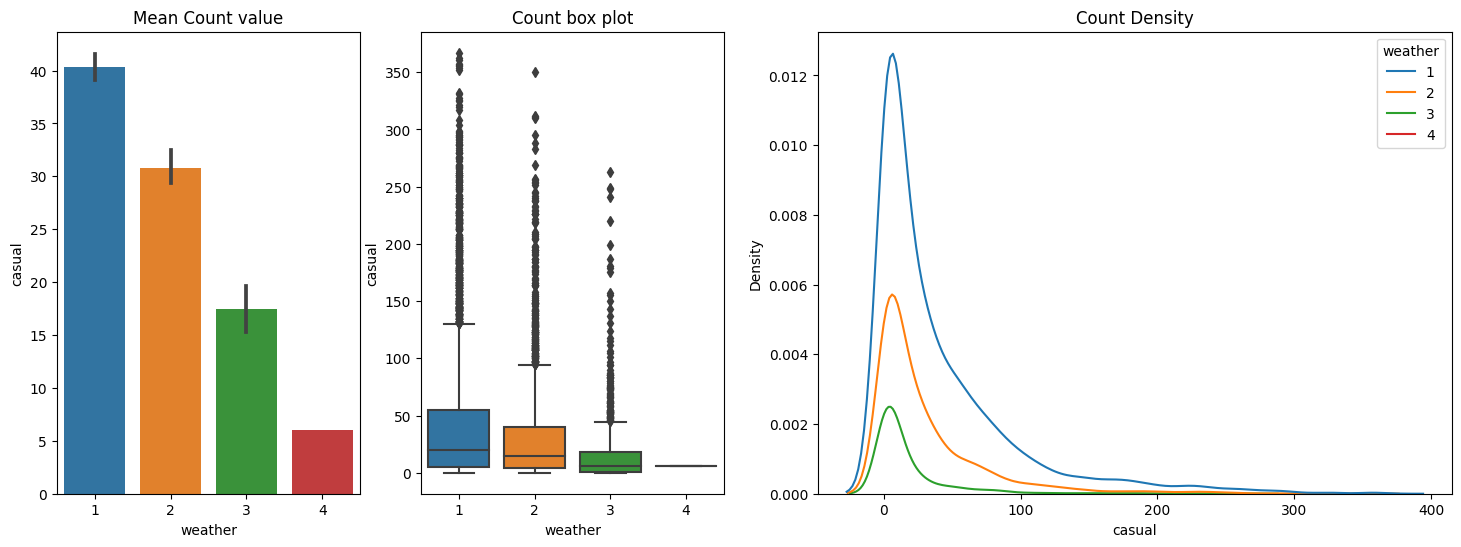

In [ ]:
bivariateplot(info = data,cat ="weather",num="casual")

In [ ]:
bivariateboxplotparameter(cat ="weather",num="casual")

count       mean        std  min  25%   50%   75%    max  \
weather                                                              
1        7192.0  40.308676  53.443710  0.0  5.0  20.0  55.0  367.0   
2        2834.0  30.785462  43.027108  0.0  4.0  15.0  40.0  350.0   
3         859.0  17.442375  31.993259  0.0  1.0   6.0  18.5  263.0   
4           1.0   6.000000        NaN  6.0  6.0   6.0   6.0    6.0   

         upper_Limit  
weather               
1             130.00  
2              94.00  
3              44.75  
4               6.00

Now let us do Hypothesis Testing to check if Weather has impact on Casual

### Hypothesis Testing

* As seen Bivariate "Count Density" plots are almost Similar to Total_count, they also do not follow Normal Distribution
* So we will straight away do Kruskalwallis test

In [ ]:
weather1 = data[data["weather"]==1]["casual"]
weather2 = data[data["weather"]==2]["casual"]
weather3 = data[data["weather"]==3]["casual"]
weather4 = data[data["weather"]==4]["casual"]

#H0 : All groups have same mean
#Ha : One or more groups have different mean

kruskal_stat, p_value= kruskal(weather1,weather2,weather3,weather4)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

1.6853366233576997e-61
Reject H0
One or more groups have different mean


with >95% confidence we can say that **weather has impact on Casual user Count also**

# **Dependency of Weather and Season**

As Waether & Season are both Categorical Data, we will do Chi- Sqaured Test with below Hypthesis Condition

* Ho: Weather & Season are independent
* Ha: Weather & Seasons are not Independent

## Bivariate Analysis

In [1]:
A = pd.crosstab(data["weather"],data["season"])
print(A)

NameError: ignored

<Axes: xlabel='weather'>

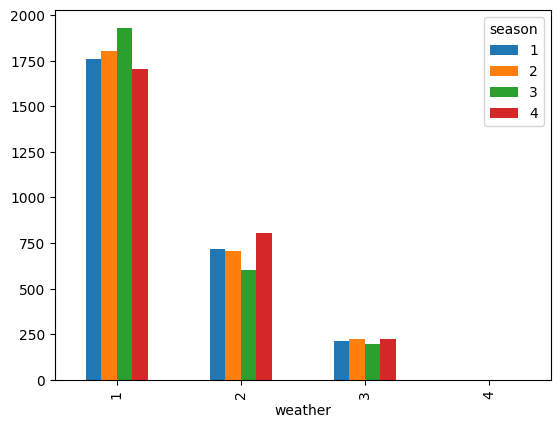

In [22]:
A.plot(kind="bar")

## Hypothesis Testing

As Weather & Season are both Categorical Data, we will do Chi2_Contigency test to test their Dependence
> Null Hypothesis can be set as below

* Ho: Weather & Season are independent
* Ha: Weather & Seasons are not Independent


In [19]:
# Ho: Weather & Season are independent
# Ha: Weather & Seasons are not Independent

chi_stat, p_value, df, exp_freq = chi2_contingency(A)

print(p_value)
print(exp_freq)
if p_value < 0.05:
  print("Reject H0")
  print("Weather & Seasons are not Independent")
else:
  print("Fail to Reject H0")
  print("Weather & Seasons are Independent")

1.5499250736864862e-07
[[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
Reject H0
Weather & Seasons are not Independent


* But for Chi Sqaured test, Expected values in each cell has to be > 5
* So we remove Weather4 data and do Chi2_Contingency test again
* A[:3] will remove 4rth row from table

In [20]:
# Ho: Weather & Season are independent
# Ha: Weather & Seasons are not Independent

chi_stat, p_value, df, exp_freq = chi2_contingency(A[:3])

print(p_value)
print(exp_freq)
if p_value < 0.05:
  print("Reject H0")
  print("Weather & Seasons are not Independent")
else:
  print("Fail to Reject H0")
  print("Weather & Seasons are Independent")

2.8260014509929403e-08
[[1774.04869086 1805.76352779 1805.76352779 1806.42425356]
 [ 699.06201194  711.55920992  711.55920992  711.81956821]
 [ 211.8892972   215.67726229  215.67726229  215.75617823]]
Reject H0
Weather & Seasons are not Independent


However result is same, with >95% Confidence we can conclude that **Weather & Seasons are Dependent**

# **Impact of Holiday on User Count**

## Holiday

* 1 : Holiday
* 0 : Not Holiday

### Univariate Analysis

In [ ]:
data['holiday'].value_counts(normalize = True)

0    0.971431
1    0.028569
Name: holiday, dtype: float64

## Holiday & total_count

### Bivariate Analysis

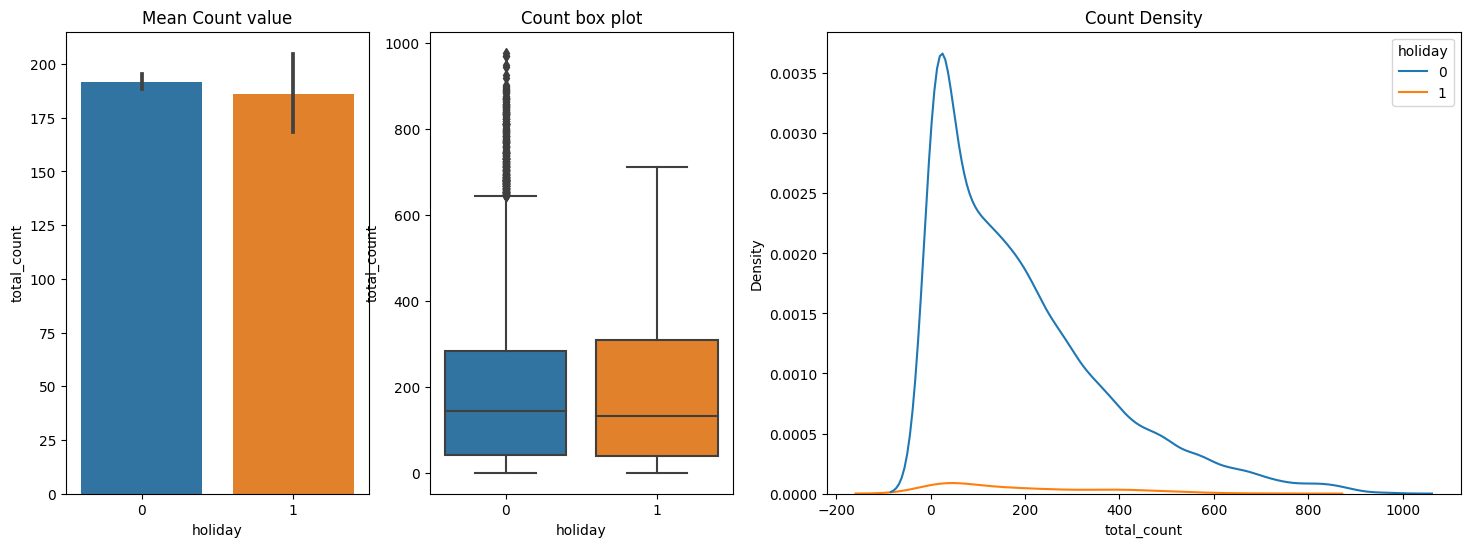

In [ ]:
bivariateplot(info = data,cat ="holiday",num="total_count")

In [ ]:
bivariateboxplotparameter(cat ="holiday",num="total_count")

count        mean         std  min   25%    50%    75%    max  \
holiday                                                                    
0        10575.0  191.741655  181.513131  1.0  43.0  145.0  283.0  977.0   
1          311.0  185.877814  168.300531  1.0  38.5  133.0  308.0  712.0   

         upper_Limit  
holiday               
0             643.00  
1             712.25

* No of user total_count reduced on a holiday compared to Non-Holiday

* Now lets do Hypothesis Testing to check if Holiday has impact on User Count

### Hypothesis Testing

As we have only 2 groups in Holiday day Category --> we will use 2 Sample/Independent T-test & check how does Holiday day effect on user count, First We will do two tailed test & later on if we reject Ho in two tailed test then we will do single tailed test

* Ho --> User Count Mean is same on Holiday & Non Holiday
* Ha --> User Count Mean is not same on Holiday & Non Holiday

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 != mu2
holiday_day = data[data["holiday"]==1]["total_count"]
nonholiday_day = data[data["holiday"]==0]["total_count"]

t_stat, p_value = ttest_ind(holiday_day,nonholiday_day)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.5736923883271103
Fail to reject H0


* with 95% confidence we can that Holiday day/Non **Holiday day has no impact on Total_user count mean**

## Holiday & Registered

### Bivariate Analysis

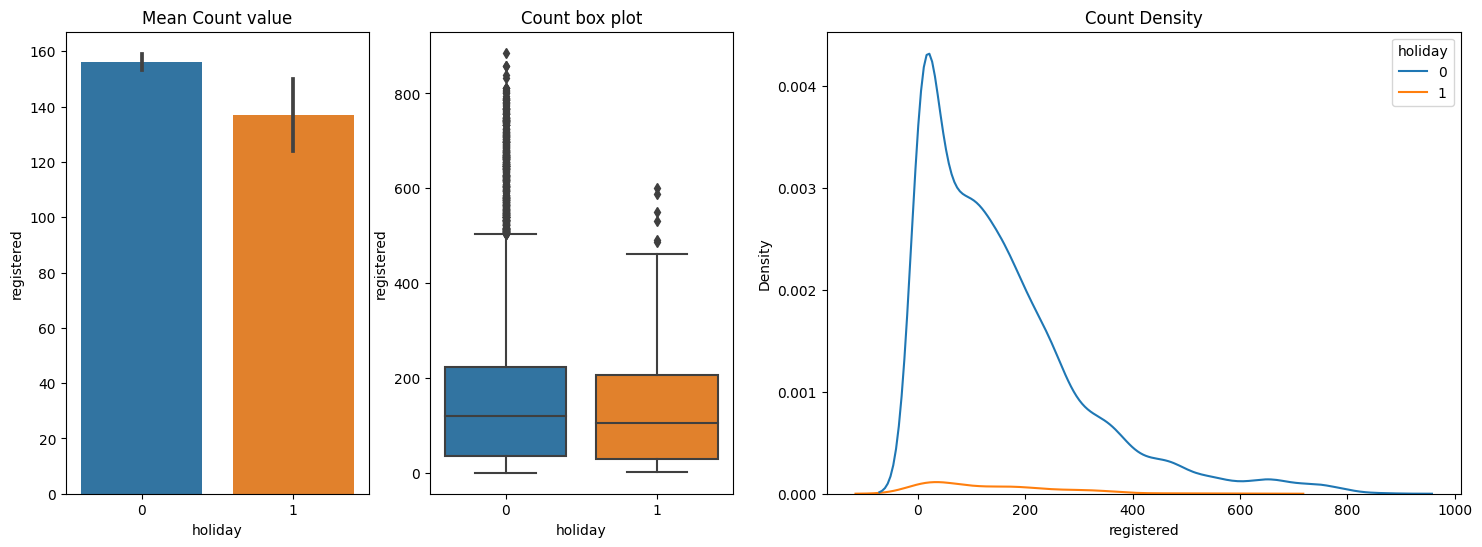

In [ ]:
bivariateplot(info = data,cat ="holiday",num="registered")

In [ ]:
bivariateboxplotparameter(cat ="holiday",num="registered")

count        mean         std  min   25%    50%    75%    max  \
holiday                                                                    
0        10575.0  156.094941  151.762822  0.0  36.0  119.0  223.0  886.0   
1          311.0  137.096463  122.715027  1.0  30.0  104.0  207.0  601.0   

         upper_Limit  
holiday               
0              503.5  
1              472.5

* No of user Registered reduced on a holiday compared to Non-Holiday
* Registered user count have almost same IQR range irrespective of Holiday

* Now lets do Hypothesis Testing to check if Holiday has impact on User Count

### Hypothesis Testing

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 != mu2
holiday_day = data[data["holiday"]==1]["registered"]
nonholiday_day = data[data["holiday"]==0]["registered"]

t_stat, p_value = ttest_ind(holiday_day,nonholiday_day)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.028784891923603277
Reject H0


* With 95% Confidence we can say that registered user count mean is not same on holiday day & Non holiday day
* Now let us check which is greater or which is lesser

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 < mu2
holiday_day = data[data["holiday"]==1]["total_count"]
nonholiday_day = data[data["holiday"]==0]["total_count"]

t_stat, p_value = ttest_ind(holiday_day,nonholiday_day,alternative = "less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.28684619416355517
Fail to reject H0


In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 > mu2
holiday_day = data[data["holiday"]==1]["total_count"]
nonholiday_day = data[data["holiday"]==0]["total_count"]

t_stat, p_value = ttest_ind(holiday_day,nonholiday_day,alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.7131538058364448
Fail to reject H0


* with >95% confidence we can say that **Registered user mean count is not equal on holiday compared to Nonholiday**
* **It can be either greater or lesser**

## Holiday & Casual

### Bivariate Analysis

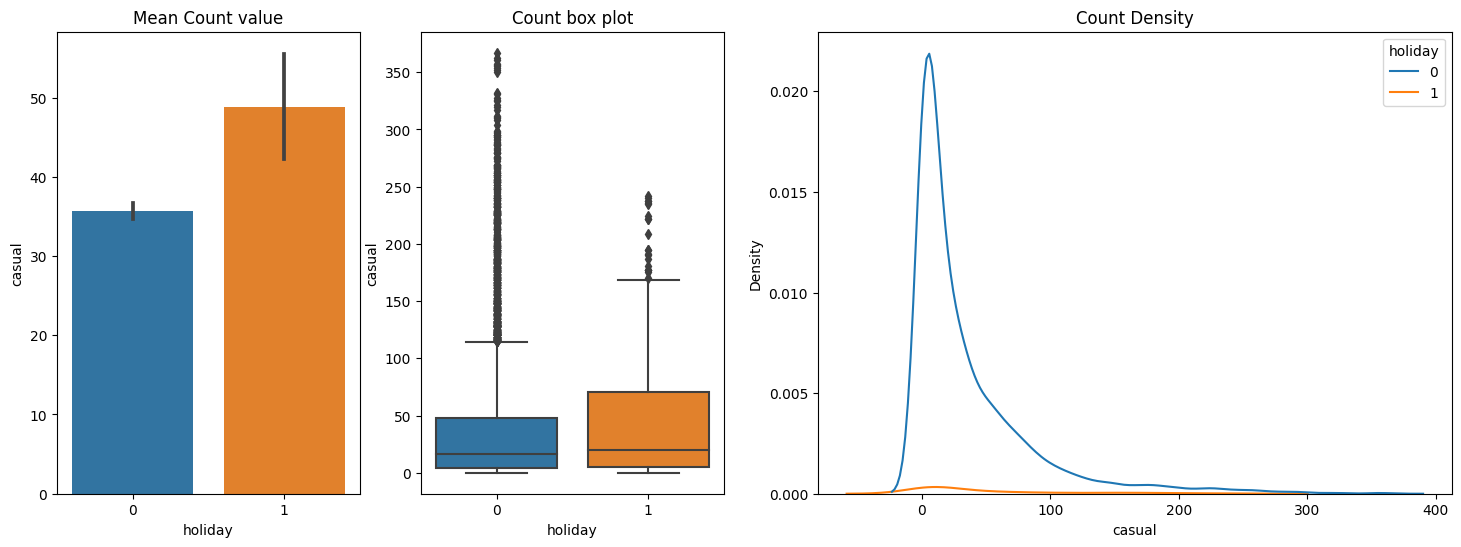

In [ ]:
bivariateplot(info = data,cat ="holiday",num="casual")

In [ ]:
bivariateboxplotparameter(cat ="holiday",num="casual")

count       mean        std  min  25%   50%   75%    max  \
holiday                                                               
0        10575.0  35.646714  49.535115  0.0  4.0  16.0  48.0  367.0   
1          311.0  48.781350  61.478009  0.0  5.0  20.0  70.5  242.0   

         upper_Limit  
holiday               
0             114.00  
1             168.75

* No of user Casual increase on a holiday compared to Non-Holiday
* Casual User count have bigger IQR range on a holiday compared to Non-holiday

* Now lets do Hypothesis Testing to check if Holiday has impact on User Count

### Hypothesis Testing

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 > mu2
holiday_day = data[data["holiday"]==1]["casual"]
nonholiday_day = data[data["holiday"]==0]["casual"]

t_stat, p_value = ttest_ind(holiday_day,nonholiday_day)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

4.843060024095186e-06
Reject H0


* With 95% Confidence we can say that casual user count mean is not same on holiday & Non holiday
* Now let us check which is greater or which is lesser

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 > mu2
holiday_day = data[data["holiday"]==1]["casual"]
nonholiday_day = data[data["holiday"]==0]["casual"]

t_stat, p_value = ttest_ind(holiday_day,nonholiday_day,alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

2.421530012047593e-06
Reject H0


* with >95% confidence we can say that **Casual user count is higher on Holiday compared to Non Holiday**

# **Impact of Workingday on User Count**

## Workingday

Workingday:
* if day is neither weekend nor holiday is 1
* otherwise is 0

### Univariate Analysis

In [ ]:
data['workingday'].value_counts(normalize = True)

1    0.680875
0    0.319125
Name: workingday, dtype: float64

## Workingday & total_count

### Bivariate Analysis

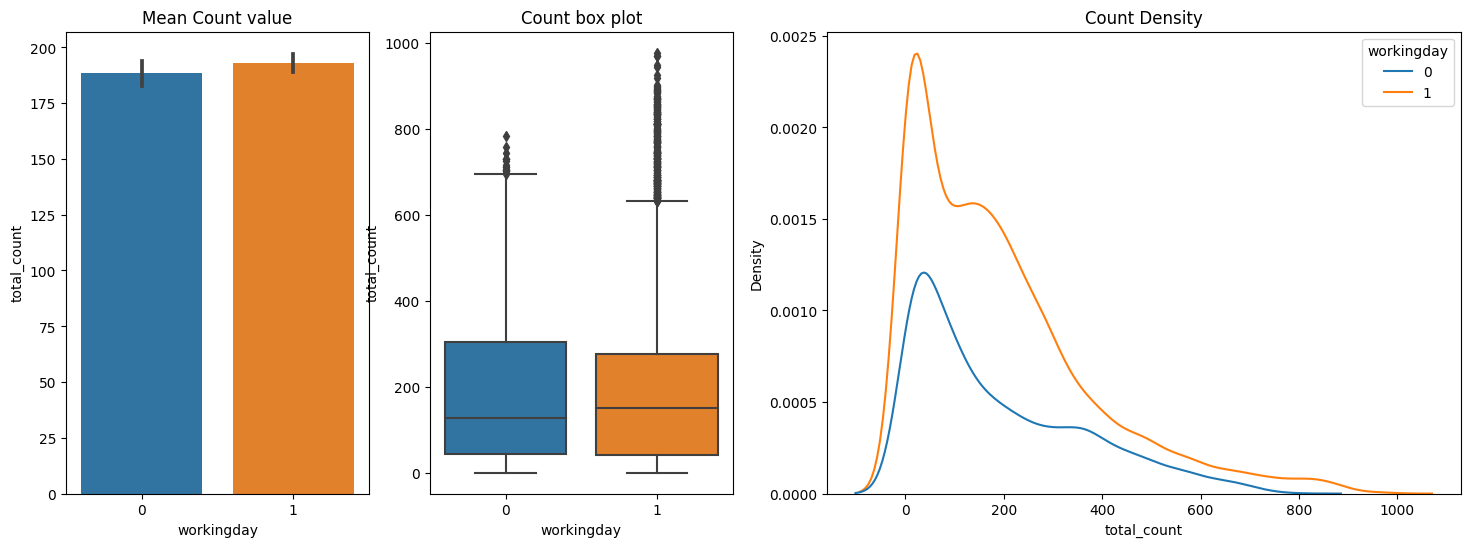

In [ ]:
bivariateplot(info = data,cat ="workingday",num="total_count")

In [ ]:
bivariateboxplotparameter(cat ="workingday",num="total_count")

count        mean         std  min   25%    50%    75%    max  \
workingday                                                                   
0           3474.0  188.506621  173.724015  1.0  44.0  128.0  304.0  783.0   
1           7412.0  193.011873  184.513659  1.0  41.0  151.0  277.0  977.0   

            upper_Limit  
workingday               
0                 694.0  
1                 631.0

* Working day has very minimal effect on Total_count Users
* Registered user counts is higher on a working day compared to Non working day
* and Casual user count is higher on a non working day compared to working day
* Now lets do Hypothesis Testing to check if Workingday has impact on User Count

### Hypothesis Testing

As we have only 2 groups in Working day Category --> we will use  2 Sample/Independent T-test & check how does working day effect on user count, First We will do two tailed test & later on if we reject Ho in two tailed test then we will do single tailed test


* Ho --> User Count Mean is same on workinday & Non workinday
* Ha --> User Count Mean is not same on workinday & Non workinday

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 != mu2
working_day = data[data["workingday"]==1]["total_count"]
nonworking_day = data[data["workingday"]==0]["total_count"]

t_stat, p_value = ttest_ind(working_day,nonworking_day)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.22644804226361348
Fail to reject H0


* with 95% confidence we can that **working day/Non Working day has no impact on Total_user count mean**

## Workingday & registered

### Bivariate Analysis

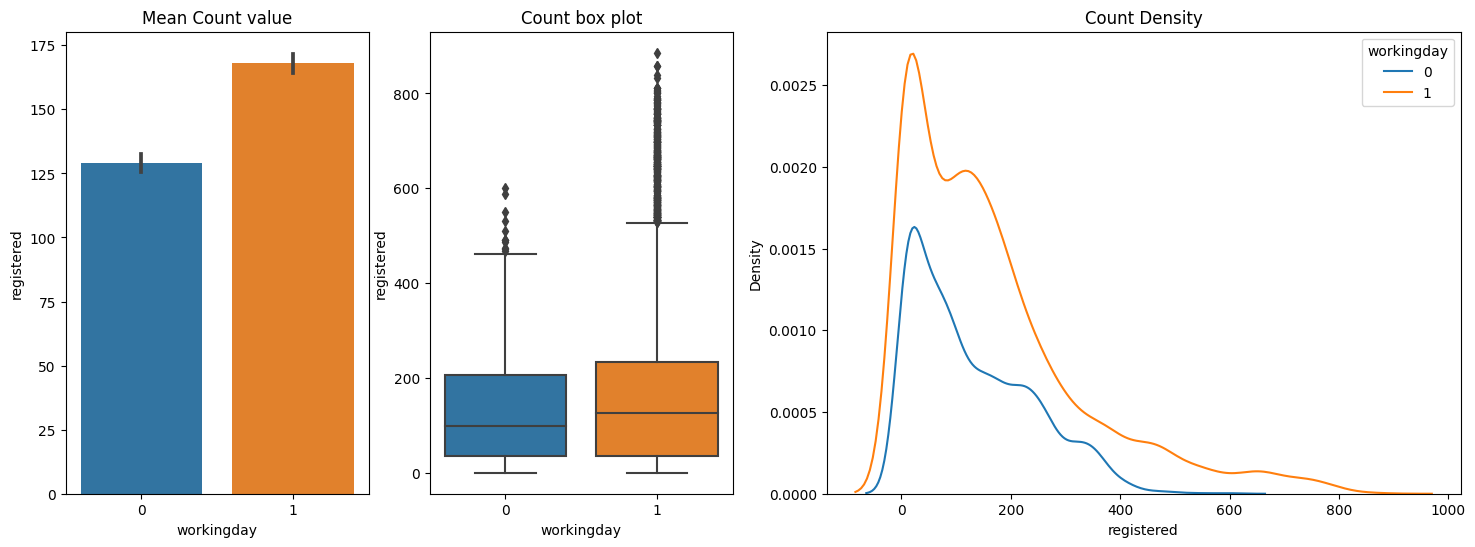

In [ ]:
bivariateplot(info = data,cat ="workingday",num="registered")

In [ ]:
bivariateboxplotparameter(cat ="workingday",num="registered")

count        mean         std  min   25%    50%    75%    max  \
workingday                                                                   
0           3474.0  129.198330  108.657340  0.0  36.0   99.0  207.0  601.0   
1           7412.0  167.904209  165.817966  0.0  36.0  127.0  233.0  886.0   

            upper_Limit  
workingday               
0                 463.5  
1                 528.5

* Registered user counts is higher on a working day compared to Non working day
* Now lets do Hypothesis Testing to check if Workingday has impact on User Count

### Hypothesis Testing

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 != mu2
working_day = data[data["workingday"]==1]["registered"]
nonworking_day = data[data["workingday"]==0]["registered"]

t_stat, p_value = ttest_ind(working_day,nonworking_day)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

6.806493719916074e-36
Reject H0


* With 95% Confidence we can say that registered user count mean is not same on working day & Non working day
* Now let us check which is greater or which is lesser

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 >  mu2
working_day = data[data["workingday"]==1]["registered"]
nonworking_day = data[data["workingday"]==0]["registered"]

t_stat, p_value = ttest_ind(working_day,nonworking_day,alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

3.403246859958037e-36
Reject H0


* with >95% confidence we can say that **registered user count is higher on Working day compared to Nonworking day**

## Workingday & casual

### Bivariate Analysis

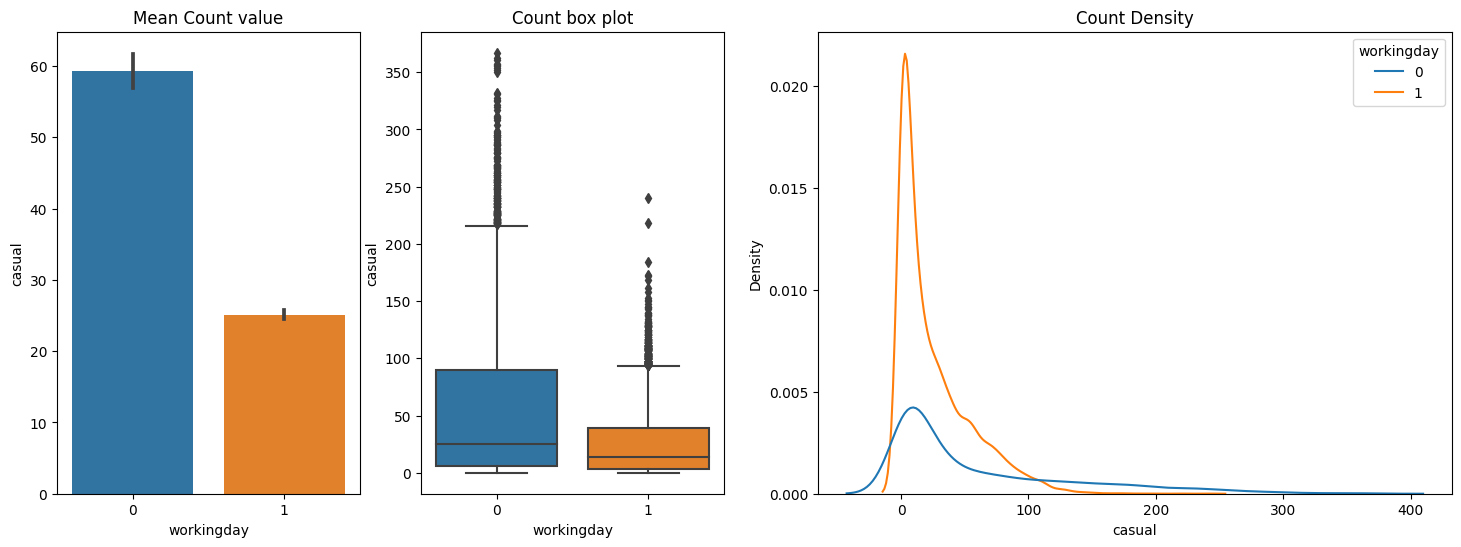

In [ ]:
bivariateplot(info = data,cat ="workingday",num="casual")

In [ ]:
bivariateboxplotparameter(cat ="workingday",num="casual")

count       mean        std  min  25%   50%   75%    max  \
workingday                                                              
0           3474.0  59.308290  72.669078  0.0  6.0  25.0  90.0  367.0   
1           7412.0  25.107663  28.601591  0.0  3.0  14.0  39.0  240.0   

            upper_Limit  
workingday               
0                 216.0  
1                  93.0

* Casual user count is higher on a non working day compared to working day
* Now lets do Hypothesis Testing to check if Workingday has impact on User Count

### Hypothesis Testing

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 != mu2
working_day = data[data["workingday"]==1]["casual"]
nonworking_day = data[data["workingday"]==0]["casual"]

t_stat, p_value = ttest_ind(working_day,nonworking_day)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

3.56196742360544e-256
Reject H0


* With 95% Confidence we can say that casual user count mean is not same on working day & Non working day
* Now let us check which is greater or which is lesser

In [ ]:
# Ho: mu1 = mu2
# Ha: mu1 >  mu2
working_day = data[data["workingday"]==1]["casual"]
nonworking_day = data[data["workingday"]==0]["casual"]

t_stat, p_value = ttest_ind(working_day,nonworking_day,alternative = "less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

1.78098371180272e-256
Reject H0


* with >95% confidence we can say that **Casual user count is higher on Nonworking day compared to Working day**

# **Relation between Temp & Feeling_temp**

* Lets check if there is any correlation between Temp & Feeling_temp
* if yes,We will prove Correlation with hypothesis testing
* Then checking impact of any one of these two features will be sufficent

<Axes: xlabel='temp', ylabel='feeling_temp'>

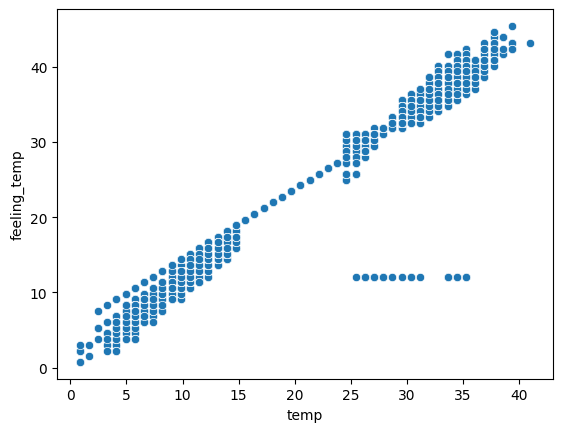

In [9]:
sns.scatterplot(x= data["temp"],y=data["feeling_temp"])

As Temp & Feelin_temp are having Linear Relationship, we will use Pearson Correlation coefficent for finding correlation among these two columns

In [ ]:
data[["temp","feeling_temp"]].corr()

temp  feeling_temp
temp          1.000000      0.984948
feeling_temp  0.984948      1.000000

* "Temp" & "Feeling_temp" are highly correlated
* LEts do Hypothesis testing to confirm same

## Hypothesis Testing

As Temp and feeling_temp are both numerical, we will do Pearson as they have  Linear relationship

* Ho: No correlation between Temp & Feeling_temp
* Ha: There is correlation between Temp & Feeling_temp

In [10]:
# H0: No correlation
# Ha: There is correlation

pearson_coeff, p_value = pearsonr(data["temp"], data["feeling_temp"])

print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.0
Reject H0
There is correlation


* with >95%  we can say that there is **Strong Correlation between Temp & Feeling_temp**
* Further in the analysis , we will use analysis only on "Temp"

# **Impact of Temp on User Count**

## Temp

### Univariate Analysis

In [15]:
data["temp"].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

<Axes: xlabel='temp', ylabel='Count'>

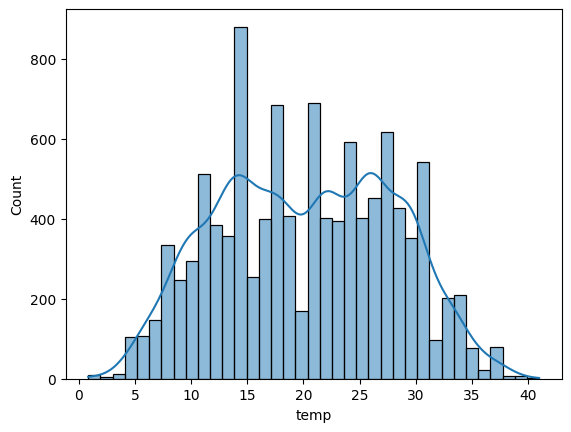

In [13]:
sns.histplot(data["temp"],kde=True)

Temp covers vast range from 0.82 to 41

## Temp & total_count

### Bivariate Analysis

<Axes: xlabel='temp', ylabel='total_count'>

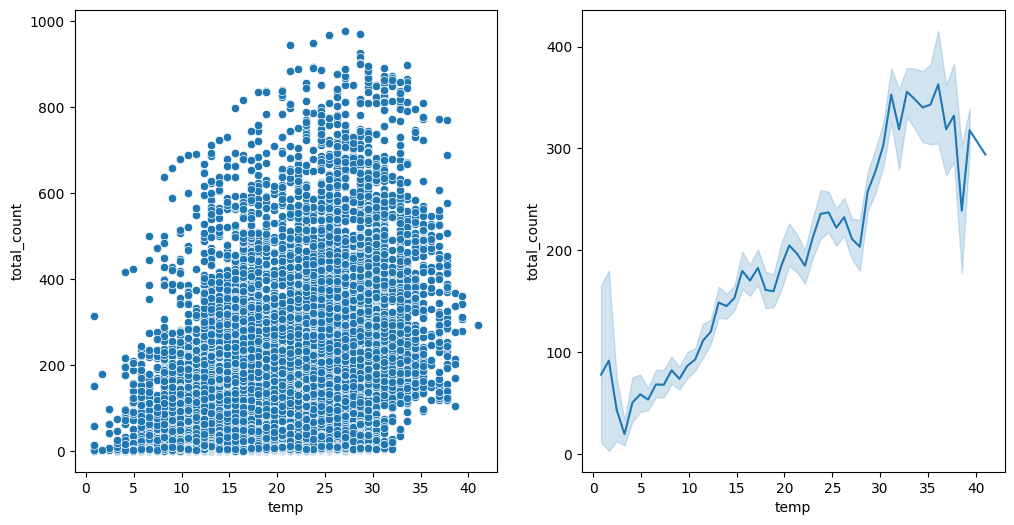

In [27]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["temp"], y=data["total_count"])
plt.subplot(1,2,2)
sns.lineplot(x=data["temp"],y=data["total_count"])

* from lineplot, users Avg count increased as the temperature increased till 36 deg Celsius & then count dropped
* from scatter plot We can see there is no linear relationship between temperature and Total_count, so we will do spearman Correlation test

### Hypothesis Testing

As Temp and Users Count are both numerical, we will do Spearman Test as relation is somewhat nonlinear as seen in scatterplot

* Ho: No correlation between Temp & Total_count
* Ha: There is correlation between Temp & Total_count

In [17]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["temp"], data["total_count"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.40798939475098117
0.0
Reject H0
There is correlation


with >95% Confidence we can that **Temp has good correlation with Total_users count**

## Temp & registered

### Bivariate Analysis

<Axes: xlabel='temp', ylabel='registered'>

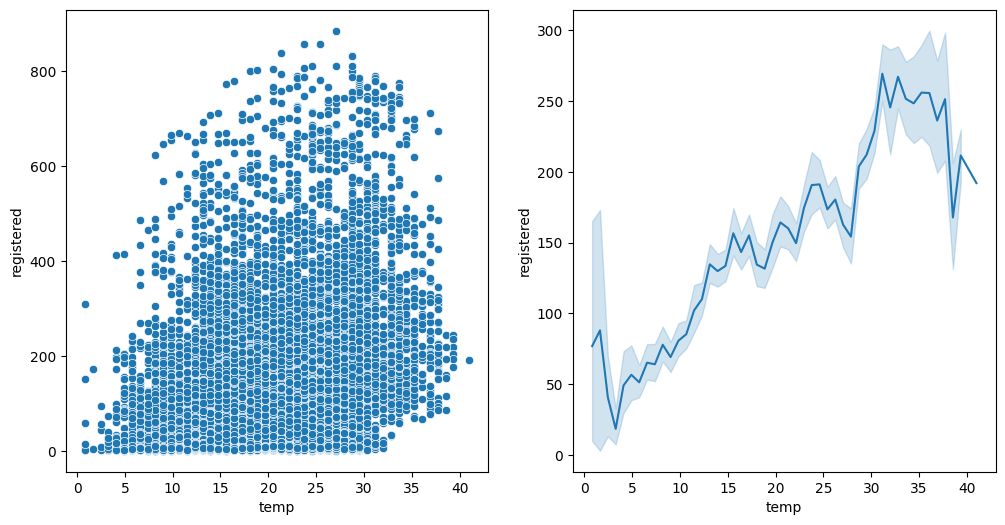

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["temp"], y=data["registered"])
plt.subplot(1,2,2)
sns.lineplot(x=data["temp"],y=data["registered"])

We can see there is no linear realtionship between temperature and registered, so we will do spearman Correlation test

### Hypothesis Testing

In [18]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["temp"], data["registered"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.3521739089493575
0.0
Reject H0
There is correlation


with >95% Confidence we can that **Temperature has good correlation with Registered user count also**

## Temp vs Casual

### Bivariate Analysis

<Axes: xlabel='temp', ylabel='casual'>

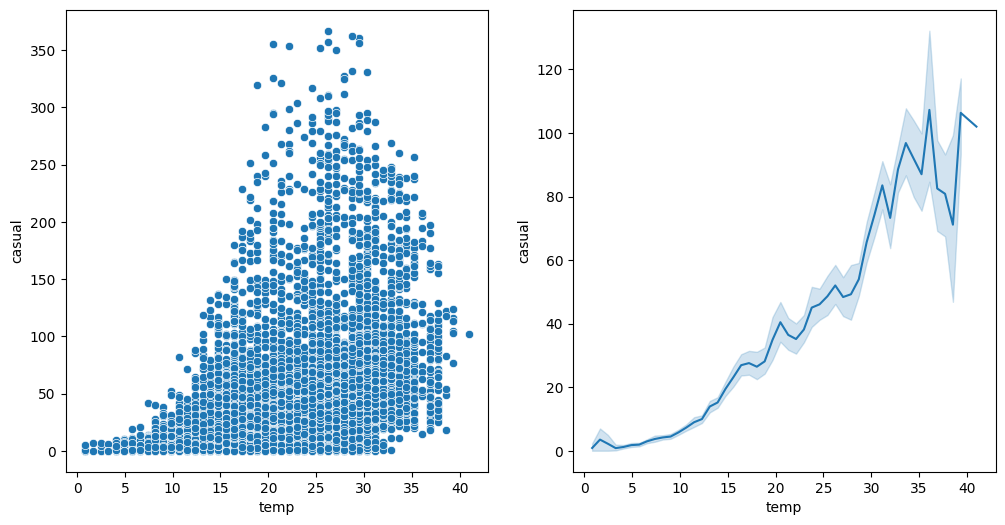

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["temp"], y=data["casual"])
plt.subplot(1,2,2)
sns.lineplot(x=data["temp"],y=data["casual"])

Here also We can see there is no linear realtionship between temp and casual, so we will do spearman Correlation test to confirm Correlation

### Hypothesis Testing

In [19]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["temp"], data["casual"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.5730339864588696
0.0
Reject H0
There is correlation


with >95% Confidence we can that **Temperature has very good correlation with casual count**

# **Impact of Humidity on User Count**

## Humidity

### Univariate Analysis

In [30]:
data["humidity"].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [34]:
data["humidity"].value_counts().sort_values(ascending = False)[:10]

88    368
94    324
83    316
87    289
70    259
65    253
46    247
66    246
77    244
49    234
Name: humidity, dtype: int64

<Axes: xlabel='humidity', ylabel='Count'>

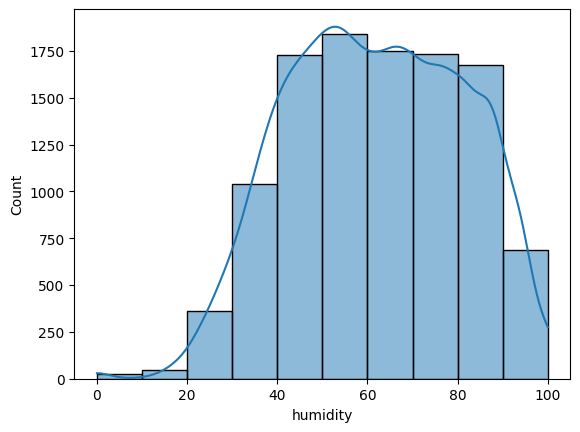

In [37]:
sns.histplot(data["humidity"],kde=True,bins=10)

* humidity covers vast range from 0 to 100
* we can see distribution is left skewed, Humidity was mostly found in the range 40 ~ 100

## Humidity & total_count

### Bivariate Analysis

<Axes: xlabel='humidity', ylabel='total_count'>

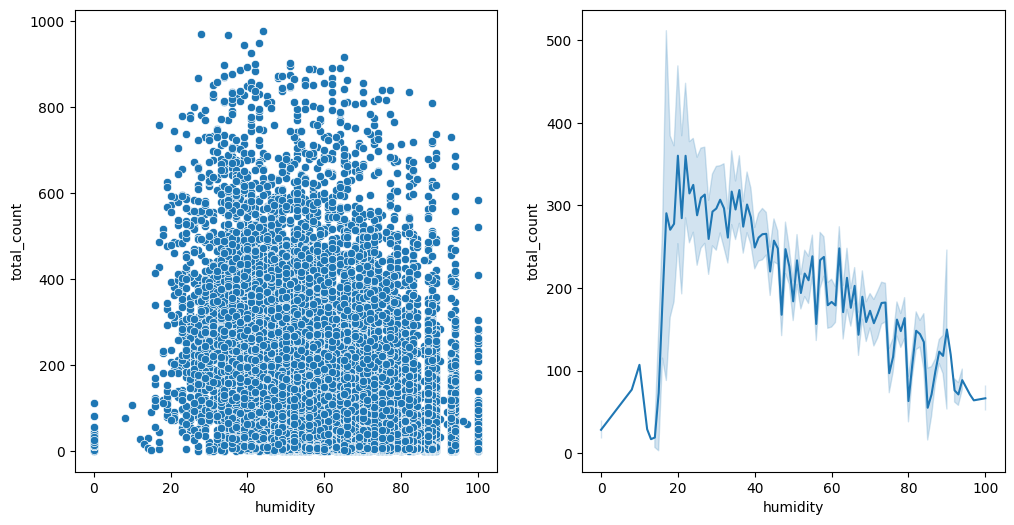

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["humidity"], y=data["total_count"])
plt.subplot(1,2,2)
sns.lineplot(x=data["humidity"],y=data["total_count"])

In [40]:
data.groupby("humidity")["total_count"].mean().sort_values(ascending=False)

humidity
20    360.200000
22    360.111111
24    324.891892
36    318.581395
34    316.741935
         ...    
85     55.000000
12     29.000000
0      28.318182
14     19.000000
13     17.000000
Name: total_count, Length: 89, dtype: float64

* from lineplot,Avg Users count reduced with increase in humididty
* Avg Users count peaked in the humidity range of 20-22 & then grdually dropped
* from scatter plot We can see there is no linear relationship between humidity and Total_count, but somewhat nonlinear relationship exists from humidity 20 to 100 -->Humidity increase, avg count decreases, so we will do spearman Correlation test

### Hypothesis Testing

As humidity and Users Count are both numerical, we will do Spearman Test as relation is somewhat nonlinear as seen in scatterplot

* Ho: No correlation between humidity & Total_count
* Ha: There is correlation between humidity & Total_count

In [41]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["humidity"], data["total_count"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

-0.35404912201756106
0.0
Reject H0
There is correlation


with >95% Confidence we can that **Humidity has good correlation with Total_users count**

## Humidity & registered

### Bivariate Analysis

<Axes: xlabel='humidity', ylabel='registered'>

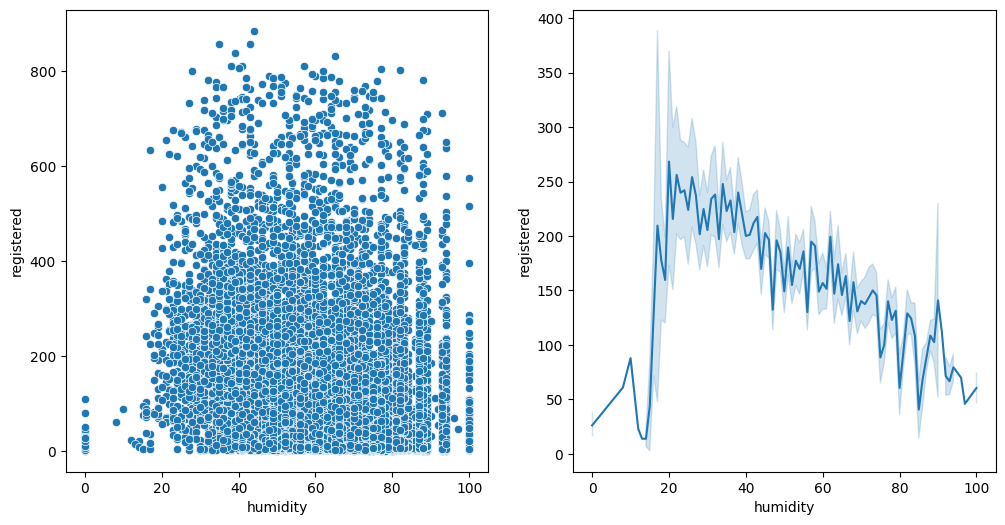

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["humidity"], y=data["registered"])
plt.subplot(1,2,2)
sns.lineplot(x=data["humidity"],y=data["registered"])

* from scatter plot We can see Scatter plot almost similar to total_count, so we will do spearman Correlation test

### Hypothesis Testing

In [43]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["humidity"], data["registered"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

-0.3327852720850499
9.109728174109745e-280
Reject H0
There is correlation


with >95% Confidence we can that **Humidity has good correlation with Registered user count also**

## Humidity vs Casual

### Bivariate Analysis

<Axes: xlabel='humidity', ylabel='casual'>

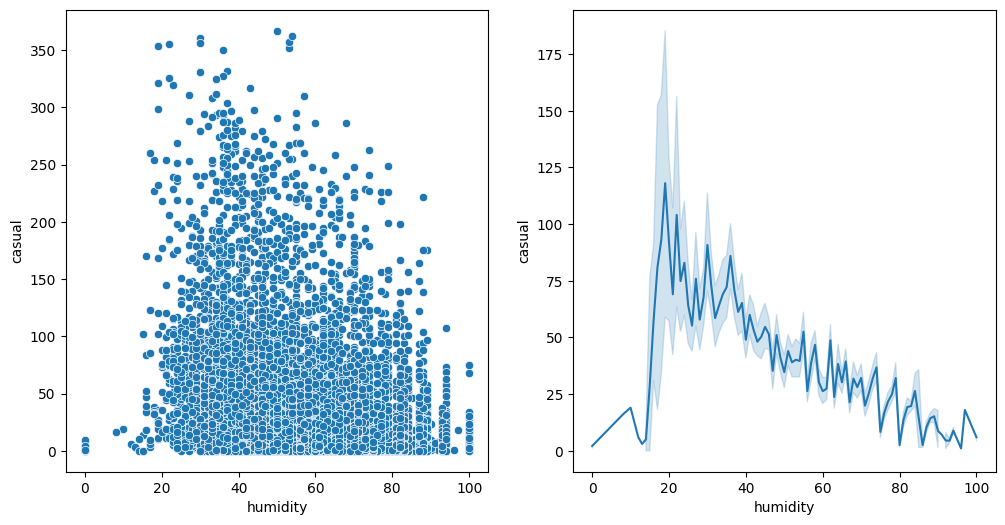

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["humidity"], y=data["casual"])
plt.subplot(1,2,2)
sns.lineplot(x=data["humidity"],y=data["casual"])

In [45]:
data.groupby("humidity")["casual"].mean().sort_values(ascending=False)

humidity
19    118.066667
22    104.055556
18     93.142857
20     91.900000
30     90.800000
         ...    
13      3.000000
80      2.483333
86      2.475000
0       2.090909
96      1.000000
Name: casual, Length: 89, dtype: float64

Here also We can see there is no linear realtionship between humidity and casual,but scatterplot almost similar to total_count so we will do spearman Correlation test to confirm Correlation

### Hypothesis Testing

In [46]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["humidity"], data["casual"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

-0.37825398444075015
0.0
Reject H0
There is correlation


with >95% Confidence we can that **Humidity has very good correlation with casual count**

# **Impact of Windspeed on User Count**

## Windspeed

### Univariate Analysis

In [47]:
data["windspeed"].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [49]:
data["windspeed"].value_counts().sort_values(ascending = False)

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

<Axes: xlabel='windspeed', ylabel='Count'>

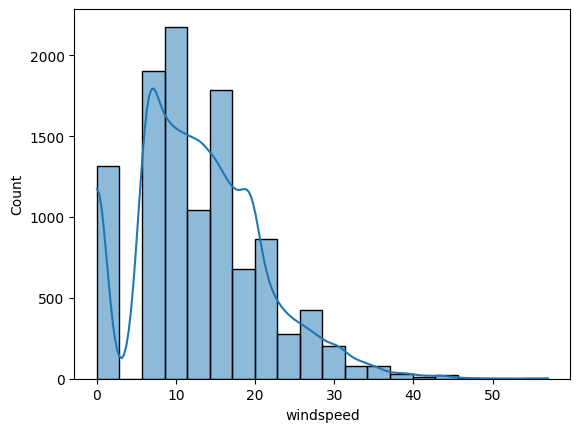

In [51]:
sns.histplot(data["windspeed"],kde=True,bins=20)

* windspeed covers vast range from 0 to 56
* Mostly wind are in the range 8 ~ 24

## Windspeed & total_count

### Bivariate Analysis

<Axes: xlabel='windspeed', ylabel='total_count'>

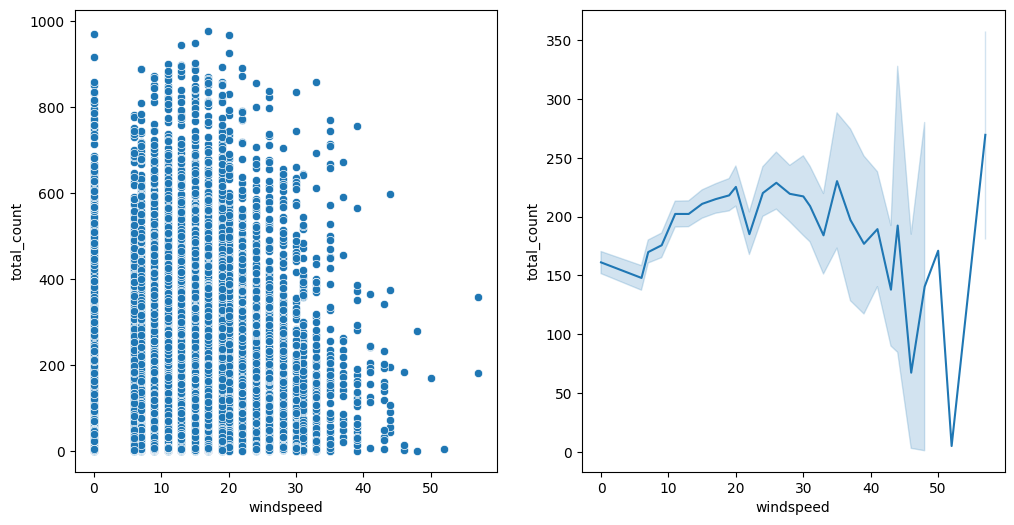

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["windspeed"], y=data["total_count"])
plt.subplot(1,2,2)
sns.lineplot(x=data["windspeed"],y=data["total_count"])

In [53]:
data.groupby("windspeed")["total_count"].mean().sort_values(ascending=False)

windspeed
56.9969    269.500000
35.0008    230.155172
26.0027    228.744681
19.9995    225.235772
23.9994    220.010949
27.9993    219.363636
19.0012    218.051775
30.0026    217.171171
16.9979    214.847087
15.0013    210.833507
31.0009    208.955056
11.0014    202.262062
12.9980    202.249520
36.9974    197.045455
43.9989    192.375000
40.9973    189.363636
22.0028    185.053763
32.9975    184.075000
39.0007    176.888889
8.9981     175.645536
50.0021    171.000000
7.0015     169.852031
0.0000     161.101295
6.0032     147.864679
47.9988    140.500000
43.0006    137.916667
46.0022     67.333333
51.9987      5.000000
Name: total_count, dtype: float64

* from lineplot,Avg Users count reduced with increase in humididty
* Avg Users count peaked in the Windspeed range of 20-35
* from scatter plot We can see there is no linear relationship between windspeed and Total_count, but somewhat nonlinear relationship exists --> windspeed increase, avg count increases &decreases, so we will do spearman Correlation test

### Hypothesis Testing

As windspeed and Users Count are both numerical, we will do Spearman Test as relation is somewhat nonlinear as seen in scatterplot

* Ho: No correlation between windspeed & Total_count
* Ha: There is correlation between windspeed & Total_count

In [54]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["windspeed"], data["total_count"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.1357773747113304
5.9015220272171205e-46
Reject H0
There is correlation


with >95% Confidence we can that **Windspeed has some correlation with Total_users count**

## Windspeed & registered

### Bivariate Analysis

<Axes: xlabel='windspeed', ylabel='registered'>

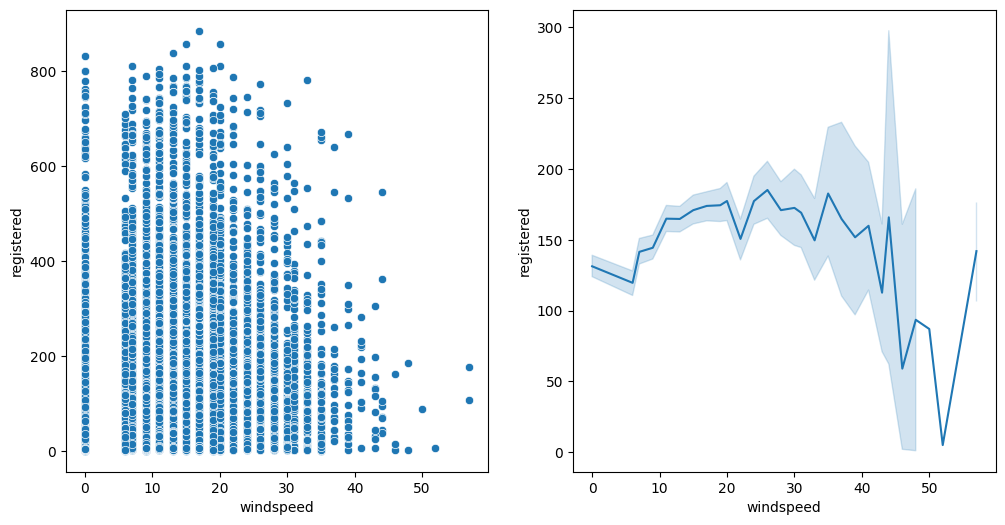

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["windspeed"], y=data["registered"])
plt.subplot(1,2,2)
sns.lineplot(x=data["windspeed"],y=data["registered"])

* from scatter plot We can see Scatter plot almost similar to total_count, so we will do spearman Correlation test

### Hypothesis Testing

In [56]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["windspeed"], data["registered"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.1310105557360677
7.021712949752176e-43
Reject H0
There is correlation


\with >95% Confidence we can that **Windspeed has some correlation with Registered user count also**

## Windspeed vs Casual

### Bivariate Analysis

<Axes: xlabel='windspeed', ylabel='casual'>

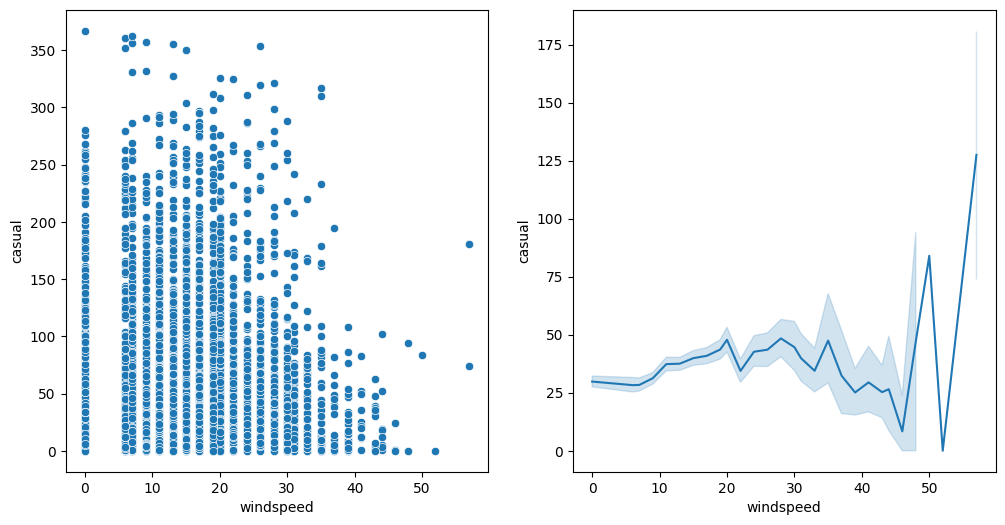

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data["windspeed"], y=data["casual"])
plt.subplot(1,2,2)
sns.lineplot(x=data["windspeed"],y=data["casual"])

In [58]:
data.groupby("windspeed")["casual"].mean().sort_values(ascending=False)

windspeed
56.9969    127.500000
50.0021     84.000000
27.9993     48.401070
19.9995     47.800813
35.0008     47.448276
47.9988     47.000000
30.0026     44.612613
19.0012     43.630178
26.0027     43.536170
23.9994     42.656934
16.9979     40.901699
15.0013     39.883455
31.0009     39.808989
12.9980     37.501919
11.0014     37.324503
32.9975     34.450000
22.0028     34.403226
36.9974     32.318182
8.9981      31.256250
0.0000      29.805788
40.9973     29.454545
7.0015      28.354932
6.0032      28.262615
43.9989     26.500000
43.0006     25.250000
39.0007     25.111111
46.0022      8.333333
51.9987      0.000000
Name: casual, dtype: float64

Here also We can see there is no linear realtionship between Windspeed and casual,but scatterplot almost similar to total_count so we will do spearman Correlation test to confirm Correlation

### Hypothesis Testing

In [59]:
# H0: No correlation
# Ha: There is correlation

spearman_coeff, p_value = spearmanr(data["windspeed"], data["casual"])
print(spearman_coeff)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("There is correlation")
else:
    print("Fail to reject H0")
    print("There is no correlation")

0.13503958109057035
1.7962119408627083e-45
Reject H0
There is correlation


with >95% Confidence we can that **Windspeed has some correlation with casual count**

# **Feature Engineering**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  category      
 2   holiday       10886 non-null  category      
 3   workingday    10886 non-null  category      
 4   weather       10886 non-null  category      
 5   temp          10886 non-null  float64       
 6   feeling_temp  10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_count   10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
te=TargetEncoder()
data["season"]=te.fit_transform(data["season"],data["total_count"])
data["season"].value_counts()

198.988296    2734
215.251372    2733
234.417124    2733
116.343261    2686
Name: season, dtype: int64

In [ ]:
te=TargetEncoder()
data["weather"]=te.fit_transform(data["weather"],data["total_count"])
data["weather"].value_counts()

205.236791    7192
178.955540    2834
118.846333     859
187.986504       1
Name: weather, dtype: int64

In [ ]:
te=TargetEncoder()
data["holiday"]=te.fit_transform(data["holiday"],data["total_count"])
data["holiday"].value_counts()

191.741655    10575
185.877814      311
Name: holiday, dtype: int64

In [ ]:
data["workingday"]=te.fit_transform(data["workingday"],data["total_count"])
data["workingday"].value_counts()

193.011873    7412
188.506621    3474
Name: workingday, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10886 non-null  datetime64[ns]
 1   season        10886 non-null  float64       
 2   holiday       10886 non-null  float64       
 3   workingday    10886 non-null  float64       
 4   weather       10886 non-null  float64       
 5   temp          10886 non-null  float64       
 6   feeling_temp  10886 non-null  float64       
 7   humidity      10886 non-null  int64         
 8   windspeed     10886 non-null  float64       
 9   casual        10886 non-null  int64         
 10  registered    10886 non-null  int64         
 11  total_count   10886 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 1020.7 KB


In [ ]:
data.drop("datetime",axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        10886 non-null  float64
 1   holiday       10886 non-null  float64
 2   workingday    10886 non-null  float64
 3   weather       10886 non-null  float64
 4   temp          10886 non-null  float64
 5   feeling_temp  10886 non-null  float64
 6   humidity      10886 non-null  int64  
 7   windspeed     10886 non-null  float64
 8   casual        10886 non-null  int64  
 9   registered    10886 non-null  int64  
 10  total_count   10886 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 935.6 KB


In [ ]:
data.corr()

season   holiday  workingday   weather      temp  \
season        1.000000 -0.007620    0.000136  0.014393  0.697446   
holiday      -0.007620  1.000000    0.250491 -0.012219 -0.000295   
workingday    0.000136  0.250491    1.000000 -0.037005  0.029966   
weather       0.014393 -0.012219   -0.037005  1.000000  0.047353   
temp          0.697446 -0.000295    0.029966  0.047353  1.000000   
feeling_temp  0.692124  0.005215    0.024660  0.049666  0.984948   
humidity      0.150192 -0.001929   -0.010880 -0.392010 -0.064949   
windspeed    -0.126915 -0.008409    0.013373 -0.022443 -0.017852   
casual        0.271964 -0.043799   -0.319111  0.134838  0.467097   
registered    0.207020  0.020956    0.119460  0.115154  0.318571   
total_count   0.247623  0.005393    0.011594  0.133205  0.394454   

              feeling_temp  humidity  windspeed    casual  registered  \
season            0.692124  0.150192  -0.126915  0.271964    0.207020   
holiday           0.005215 -0.001929  -0.008409 -0.043799    0.020956   
workingday        0.024660 -0.010880   0.013373 -0.319111    0.119460   
weather           0.049666 -0.392010  -0.022443  0.134838    0.115154   
temp              0.984948 -0.064949  -0.017852  0.467097    0.318571   
feeling_temp      1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity         -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed        -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual            0.462067 -0.348187   0.092276  1.000000    0.497250   
registered        0.314635 -0.265458   0.091052  0.497250    1.000000   
total_count       0.389784 -0.317371   0.101369  0.690414    0.970948   

              total_count  
season           0.247623  
holiday          0.005393  
workingday       0.011594  
weather          0.133205  
temp             0.394454  
feeling_temp     0.389784  
humidity        -0.317371  
windspeed        0.101369  
casual           0.690414  
registered       0.970948  
total_count      1.000000

<Axes: >

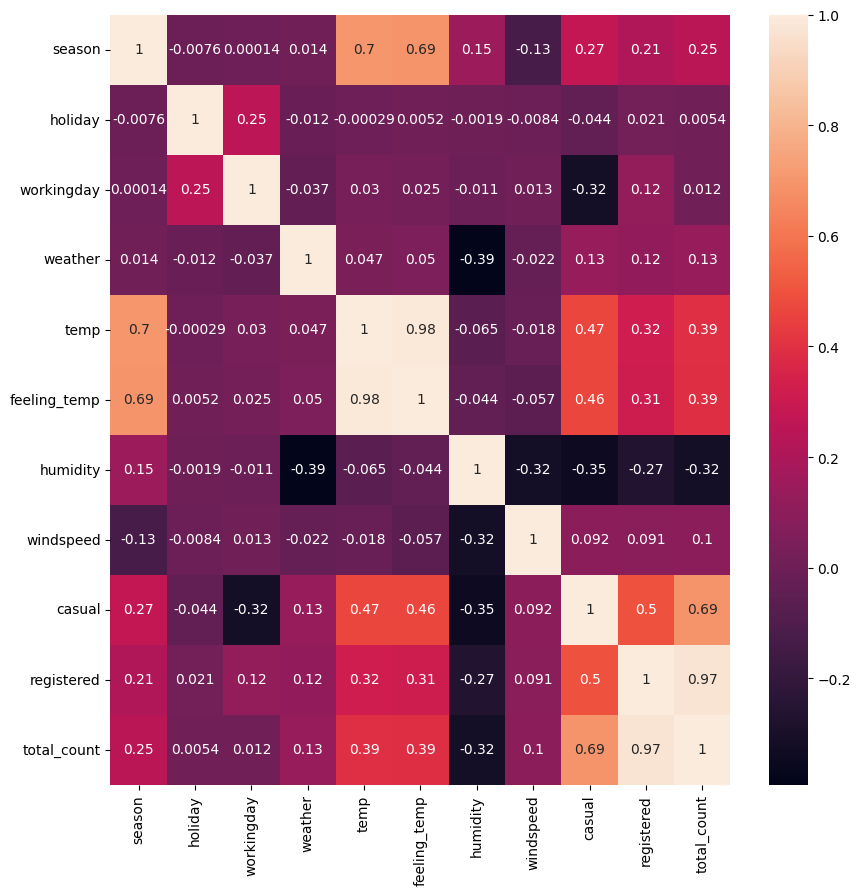

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)


# **Bussiness Insights**

**Gender**
* 75% of purchased are made by Male Customers
* Mean Purchase value of Male Customers is very high than Female
* There is no overlapping of Male & Female Population mean Purchase Value
* Male Customers are More leaned towards higher spending in the range of 12000 ~ 20000, so this point can be kept in mind by sales excecutive while upselling products/ marketing premium products



**Age**

* 40% Purchases of customer are of group 26-35 [Highest]
* 2.7% Purchases of Customer are of group 0- 17 [Lowest]
* Highest Mean Purchase value is of 51-55 group , but this group constitutes only 6.9% of all
* Mean purchase value of 26-35 ,36-45 & 55+ is almost same & are having 2nd highest Mean Purchase value, these 3 group constitutes of 64 % of all
* Lowest Mean Purchase values is of 0-17 group
* Mean purchase value of 18-25, 46-50 is almost same also Huge overlap of Confidence Interval & are having 2nd least Mean Purchase value ,but these 2 group constitutes  26 % of all
* 18-25,26-35,36-45 Groups more leaned towards higher spending in the range of 15000 ~ 20000

**Marital_Status**
* 60% Purchase made by Marital_Status:"0"
* Purchase Value density pattern is almost same for both Singles & Married, however Marital_Status:"0" more leaned towards higher spending in the range of 15000 ~ 20000
* Mean Purchase value of Married & Unmarried is almost same
* There is huge overlapping of Married & Unmarried Population mean Purchase value
* from which we can infer , marital_status has very minimal effect on Purchase values, how ever Statistical test can be used to confirm it further

**City_Category**
* Most Purchases are made by "B" City Category Customers & Least are made by "A" City Category Customers
* But Customer in City - C Category has highest mean purchase value
* and Customer in City - A Category has Least Mean Purchase Value
* There is No overlap in Confidence interval among all 3 City Cateogory Mean Purchase Values
* C & B City Category Customers more leaned towards higher spending in the range of 15000 ~ 20000
* Sales Exceutives can Sell the products as per the Purchase values in Each category

**Stay_In_Current_City_Years**
* Purchase Value density pattern is almost same across all groups with respect to Stay in Current City
* However Most Purchases are made by Customers who stayed for "1" year & Least Purchase are made by Customer who Stayed "0" years

* Customers whose stay in Current City is 2 has highest Mean Purchase value
* Customers with stay in Current City : 0 has least Mean Purchase Value
* There is huge overlap in Confidence intervals
* we can infer effect of Stay in Current City is also minimal
* High purchase customers are the one whose stay in city is 1, but their mean purchase value is 100 units less the highest - based on the Stay in Current City year/ long term Association with Walamrt, walmart should give promotional discount to attract New Comers in the city & Very old Customers in the city

# **Recommendations**

**Gender**
* Male Customers are More leaned towards higher spending in the range of 12000 ~ 20000, so this point can be kept in mind by sales excecutive while upselling products/ marketing premium product
* Additional Offers to be provided for Female Customer to increase the High value Purchases







**Age**
* 0- 17 Age Customer Purchase is Very Low, sales value of this group can be increased by giving gift coupons as per purchase value & these Gift Coupons can be used only in Walmart Play zone[Play Zone Have to be developed]
* More Upselling can be done to 18-25,26-35,36-45 as they are more prone to make purchase value ranging 15000~20000
* Purchase value based discounts to be Given to 18-25,26-35,36-45,46-50 & 55+age Groups to increase the Purchase value of these groups


**Marital_Status**
* Married customers should be given be Couple friendly Gift to Increase Purchase Value


**City_Category**
* High priced /Premium products market Introduction can be done with C-City Category Customers as a start as they are more prone to purchase value of 15000 ~ 20000
* Giving Sales Discount will increase A & B - City Category Customers purchase value
* Upselling can be done with B - Cateogory Customers along with C-City Category Customers


**Stay_In_Current_City_Years**
* High purchase customers are the one whose stay in city is 1, but their mean purchase value is 100 units less the highest - based on the Stay in Current City year/ long term Association with Walamrt, walmart should give promotional discount to attract New Comers in the city & Very old Customers in the city